In [154]:
library(ISLR)
library(ISLR2)
library(dplyr)
library(ggplot2)
library(MASS)
library(class)
library(boot)
library(leaps)
library(glmnet)
library(pls)
library(e1071)
library(splines)
library(tree)
library(gbm)

**# Chap 2 Ex 8**

This exercise relates to the College data set, which can be found in the file College.csv on the book website.
It contains a number of variables for 777 different universities and colleges in the US. The variables are

• Private : Public/private indicator
• Apps : Number of applications received
• Accept : Number of applicants accepted
• Enroll : Number of new students enrolled
• Top10perc : New students from top 10 % of high school class
• Top25perc : New students from top 25 % of high school class • F.Undergrad : Number of full-time undergraduates
• P.Undergrad : Number of part-time undergraduates
• Outstate : Out-of-state tuition
• Room.Board : Room and board costs
• Books : Estimated book costs
• Personal : Estimated personal spending
• PhD : Percent of faculty with Ph.D.’s
• Terminal : Percent of faculty with terminal degree • S.F.Ratio : Student/faculty ratio
• perc.alumni : Percent of alumni who donate
• Expend : Instructional expenditure per student
• Grad.Rate : Graduation rate

**Part A**

Use the read.csv() function to read the data into R. Call the loaded data college.
Make sure that you have the directory set to the correct location for the data.

In [3]:
college = read.csv("DataSets/College.csv", header = TRUE)

**Part B**

Look at the data using the View() function. You should notice that the first column is just the name of each university.
We don’t really want R to treat this as data. However, it may be handy to have these names for later.

In [4]:
rownames(college) = college[, 1]
head(college)

X                            Private Apps Accept
Abilene Christian University Abilene Christian University Yes     1660 1232  
Adelphi University           Adelphi University           Yes     2186 1924  
Adrian College               Adrian College               Yes     1428 1097  
Agnes Scott College          Agnes Scott College          Yes      417  349  
Alaska Pacific University    Alaska Pacific University    Yes      193  146  
Albertson College            Albertson College            Yes      587  479  
                             Enroll Top10perc Top25perc F.Undergrad P.Undergrad
Abilene Christian University 721    23        52        2885         537       
Adelphi University           512    16        29        2683        1227       
Adrian College               336    22        50        1036          99       
Agnes Scott College          137    60        89         510          63       
Alaska Pacific University     55    16        44         249         869       
Albertson College            158    38        62         678          41       
                             Outstate Room.Board Books Personal PhD Terminal
Abilene Christian University  7440    3300       450   2200     70  78      
Adelphi University           12280    6450       750   1500     29  30      
Adrian College               11250    3750       400   1165     53  66      
Agnes Scott College          12960    5450       450    875     92  97      
Alaska Pacific University     7560    4120       800   1500     76  72      
Albertson College            13500    3335       500    675     67  73      
                             S.F.Ratio perc.alumni Expend Grad.Rate
Abilene Christian University 18.1      12           7041  60       
Adelphi University           12.2      16          10527  56       
Adrian College               12.9      30           8735  54       
Agnes Scott College           7.7      37          19016  59       
Alaska Pacific University    11.9       2          10922  15       
Albertson College             9.4      11           9727  55

In [5]:
college = college[, -1] 
head(college)

Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate
Abilene Christian University 60       
Adelphi University           56       
Adrian College               54       
Agnes Scott College          59       
Alaska Pacific University    15       
Albertson College            55

**Part C**

I

Use the summary() function to produce a numerical summary of the variables in the data set.

In [6]:
summary(college)

   Private               Apps           Accept          Enroll    
 Length:777         Min.   :   81   Min.   :   72   Min.   :  35  
 Class :character   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242  
 Mode  :character   Median : 1558   Median : 1110   Median : 434  
                    Mean   : 3002   Mean   : 2019   Mean   : 780  
                    3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902  
                    Max.   :48094   Max.   :26330   Max.   :6392  
   Top10perc       Top25perc      F.Undergrad     P.Undergrad     
 Min.   : 1.00   Min.   :  9.0   Min.   :  139   Min.   :    1.0  
 1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0  
 Median :23.00   Median : 54.0   Median : 1707   Median :  353.0  
 Mean   :27.56   Mean   : 55.8   Mean   : 3700   Mean   :  855.3  
 3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0  
 Max.   :96.00   Max.   :100.0   Max.   :31643   Max.   :21836.0  
    Outstate       Room.Board       Books           Personal  

II

Use the pairs() function to produce a scatterplot matrix of the first ten columns or variables of the data.
Recall that you can reference the first ten columns of a matrix A using A[,1:10].

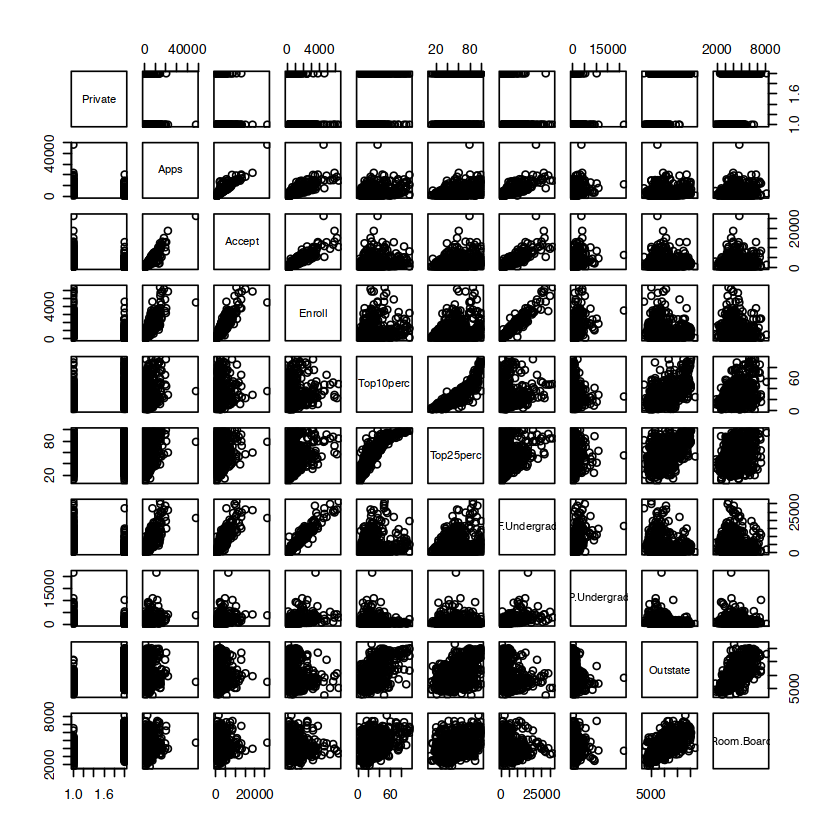

In [7]:
college[,1] = as.numeric(factor(college[,1]))
pairs(college[, 1:10])

**III**

Use the plot() function to produce side-by-side boxplots of Outstate versus Private.

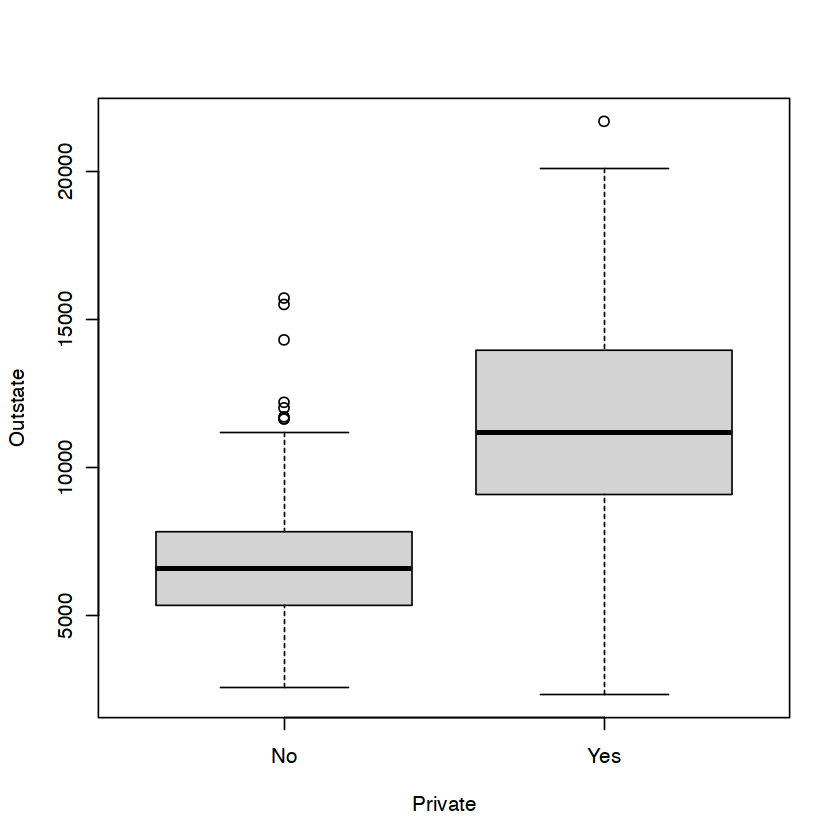

In [8]:
plot(Outstate~Private, data=College)

**IV**

Create a new qualitative variable, called Elite, by binning the Top10perc variable.
We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50 %.

In [9]:
Elite = rep("No", nrow(college))
Elite[college$Top10per > 50] = "Yes"
Elite = as.factor(Elite)
college = data.frame(college, Elite)

Use the summary() function to see how many elite universities there are.
Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.

In [10]:
summary(college$Elite)

No Yes 
699  78

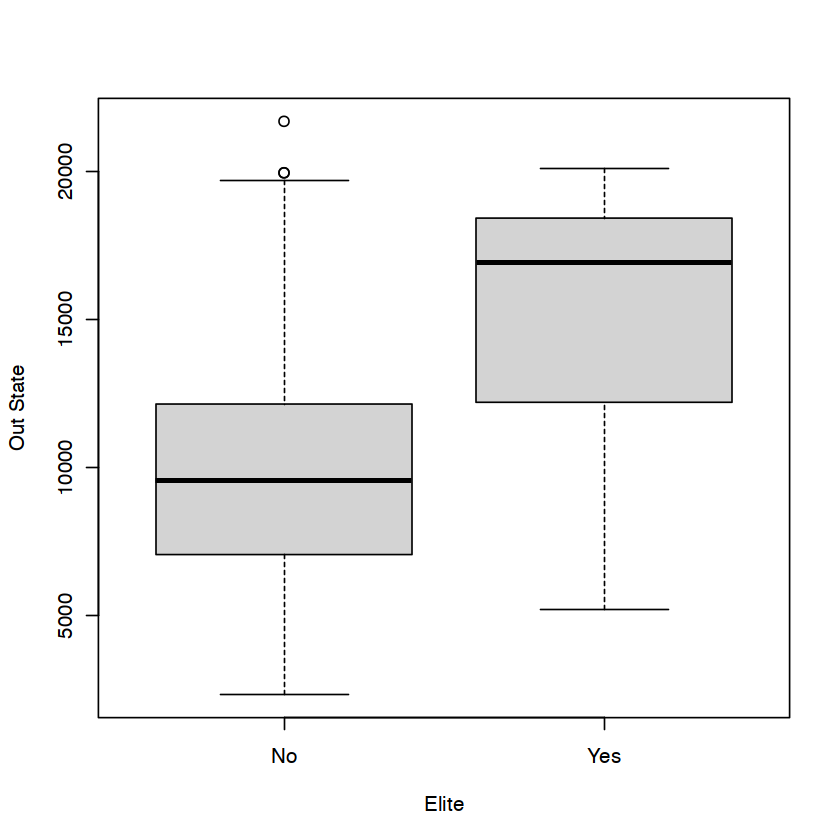

In [11]:
plot(college$Elite, college$Outstate, xlab = "Elite", ylab = "Out State")

**V**

Use the hist() function to produce some histograms with differing numbers of bins for a few of the quantitative variables.
You may find the command par(mfrow = c(2, 2)) useful: it will divide the print window into four regions so that four plots can be made simultaneously. Modifying the arguments to this function will divide the screen in other ways.

In [12]:
Private = rep("No", nrow(college))
Private[college$Private == "Yes"] = "Yes"
Private = as.factor(Private)
college = data.frame(college, Private)

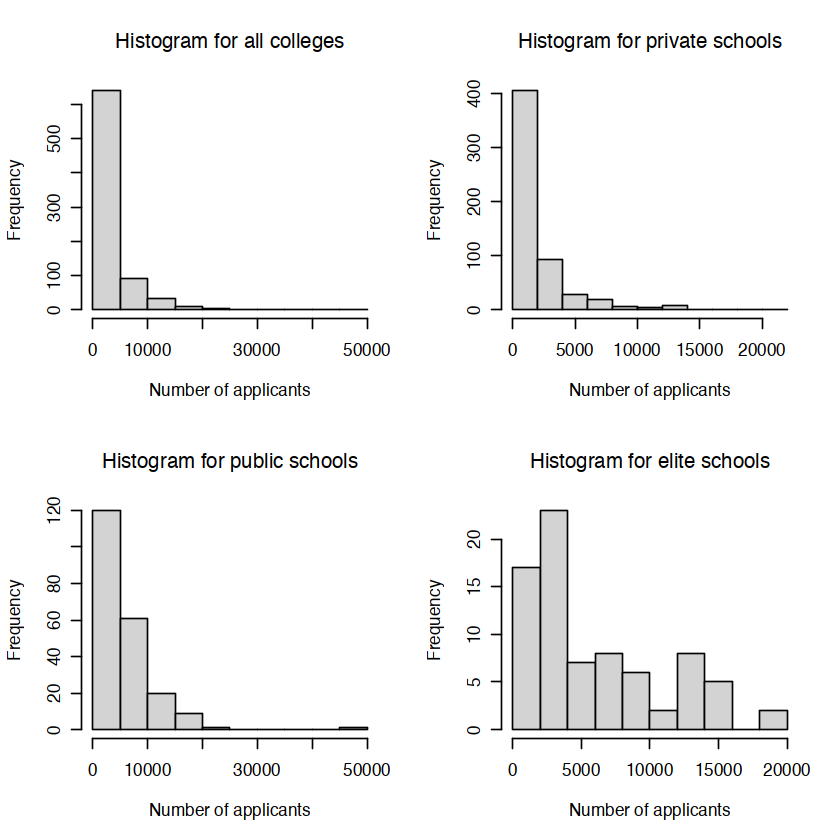

In [13]:
par(mfrow = c(2, 2))
hist(college$Apps, xlab = "Number of applicants", main = "Histogram for all colleges")
hist(college$Apps[college$Private == 2], xlab = "Number of applicants", main = "Histogram for private schools")
hist(college$Apps[college$Private == 1], xlab = "Number of applicants", main = "Histogram for public schools")
hist(college$Apps[college$Elite == "Yes"], xlab = "Number of applicants", main = "Histogram for elite schools")

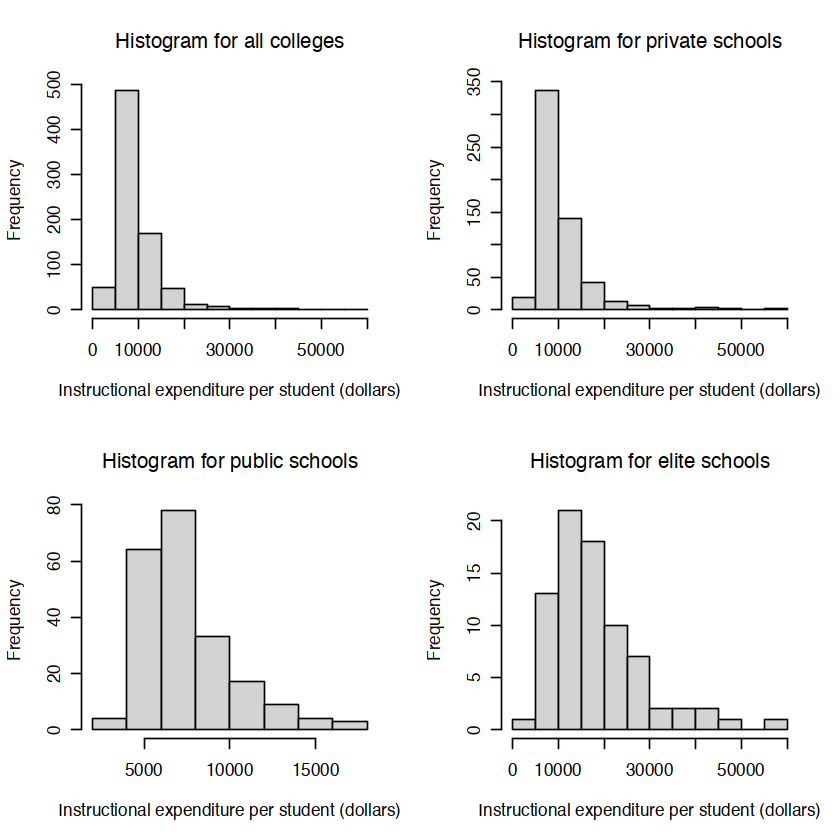

In [14]:
par(mfrow = c(2, 2))
hist(college$Expend, xlab = "Instructional expenditure per student (dollars)", main = "Histogram for all colleges")
hist(college$Expend[college$Private == 2], xlab = "Instructional expenditure per student (dollars)", main = "Histogram for private schools")
hist(college$Expend[college$Private == 1], xlab = "Instructional expenditure per student (dollars)", main = "Histogram for public schools")
hist(college$Expend[college$Elite == "Yes"], xlab = "Instructional expenditure per student (dollars)", main = "Histogram for elite schools")

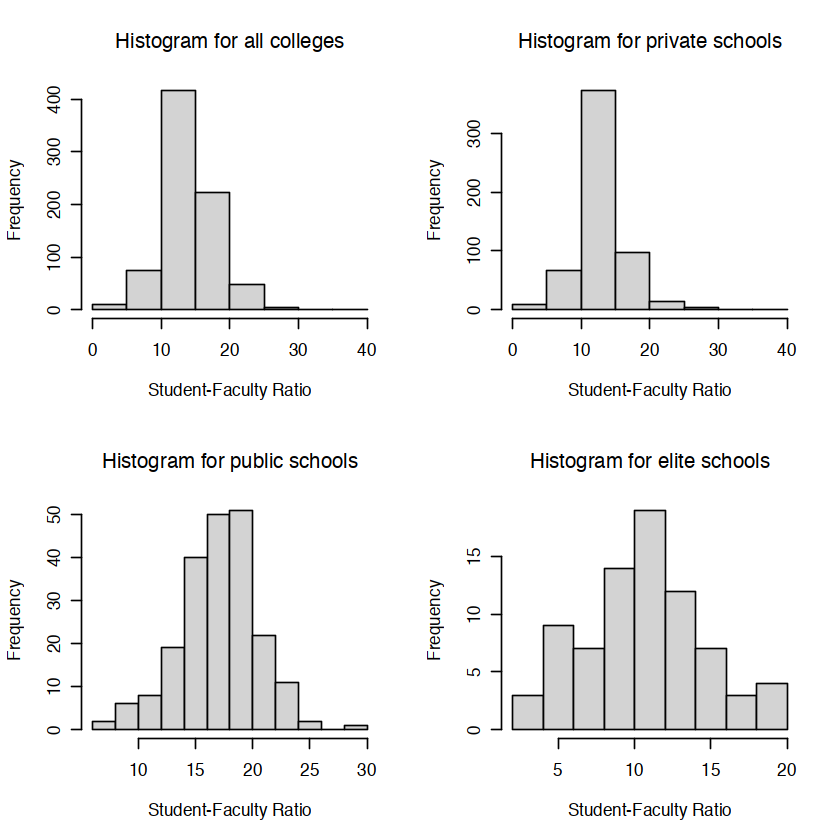

In [15]:
par(mfrow = c(2, 2))
hist(college$S.F.Ratio, xlab = "Student-Faculty Ratio", main = "Histogram for all colleges")
hist(college$S.F.Ratio[college$Private == 2], xlab = "Student-Faculty Ratio", main = "Histogram for private schools") # 2 is for YES
hist(college$S.F.Ratio[college$Private == 1], xlab = "Student-Faculty Ratio", main = "Histogram for public schools") # 1 is for NO
hist(college$S.F.Ratio[college$Elite == "Yes"], xlab = "Student-Faculty Ratio", main = "Histogram for elite schools")

**VI**

Continue exploring the data, and provide a brief summary of what you discover.

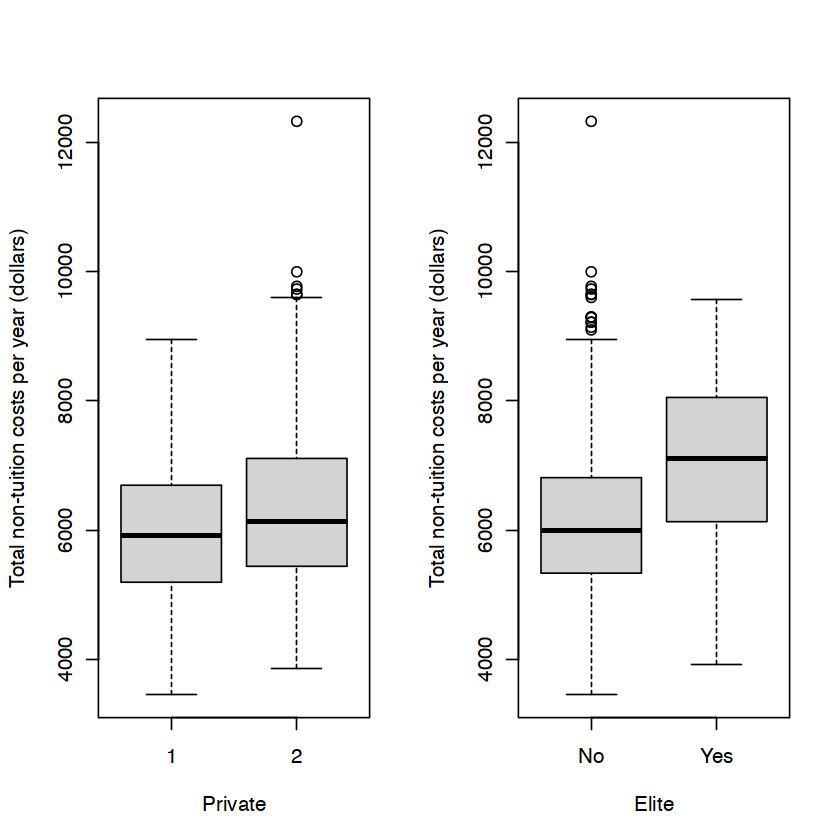

In [20]:
NonTuitionCosts = college$Room.Board + college$Books + college$Personal
college = data.frame(college, NonTuitionCosts)
par(mfrow = c(1, 2))
boxplot(NonTuitionCosts~Private, data=college, xlab = "Private", ylab = "Total non-tuition costs per year (dollars)")
plot(college$Elite, college$NonTuitionCosts, xlab = "Elite", ylab = "Total non-tuition costs per year (dollars)")

Based on the above box plots, it looks like that, aside from some outlier schools with very high costs, there isn't a wide gap for the median non-tution costs between private schools and public schools.
The box plots show that there is a distinct difference in median non-tuition costs between elite and non-elite schools, with elite schools having higher costs.

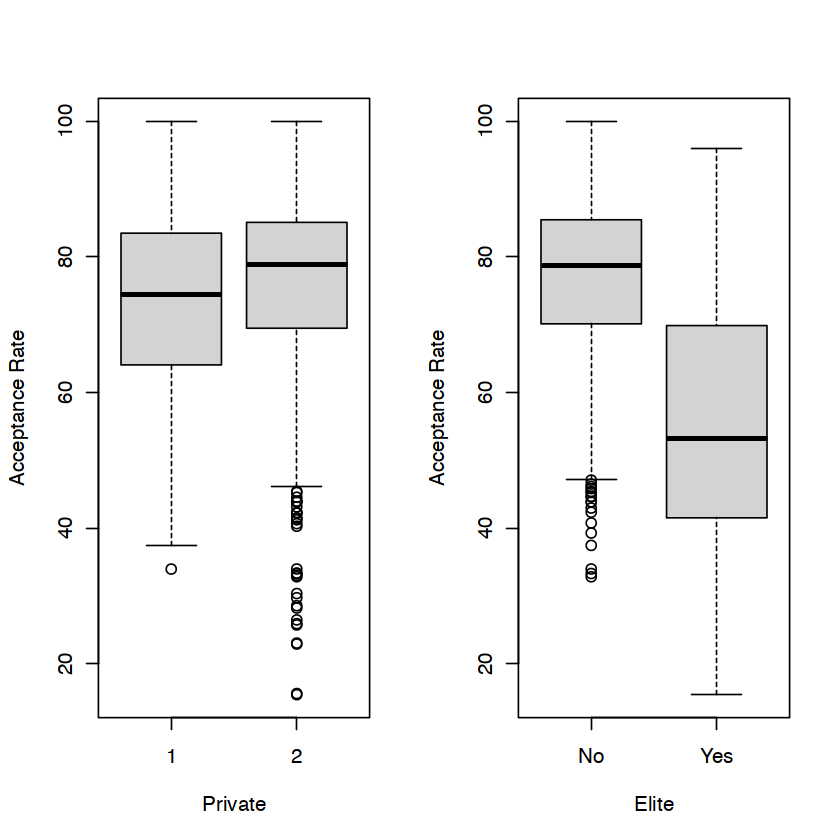

In [24]:
AcceptPerc = college$Accept / college$Apps * 100 #percentage of acceptance
college = data.frame(college, AcceptPerc)
par(mfrow = c(1, 2))
boxplot(AcceptPerc~Private, data=college, xlab = "Private", ylab = "Acceptance Rate")
plot(college$Elite, college$AcceptPerc, xlab = "Elite", ylab = "Acceptance Rate")

In [27]:
summary(college$AcceptPerc[college$Private == 2]) #YES

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.45   69.49   78.86   75.46   85.10  100.00 

In [28]:
summary(college$AcceptPerc[college$Private == 1]) #NO

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.97   64.12   74.43   72.65   83.42  100.00 

In [29]:
summary(college$AcceptPerc[college$Elite == "Yes"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.45   41.53   53.30   54.34   69.59   96.05 

In [30]:
summary(college$AcceptPerc[college$Elite == "No"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.83   70.13   78.81   76.96   85.48  100.00 

The boxplots show that while the median acceptance rates for both private and public schools are pretty close at around 75-80%, private schools have a much wider range of acceptance rates (going down to a minimum of 15.45%). When we distinguish between elite and non-elite schools, elite schools have a much lower median acceptance rate compared to non-elite ones.

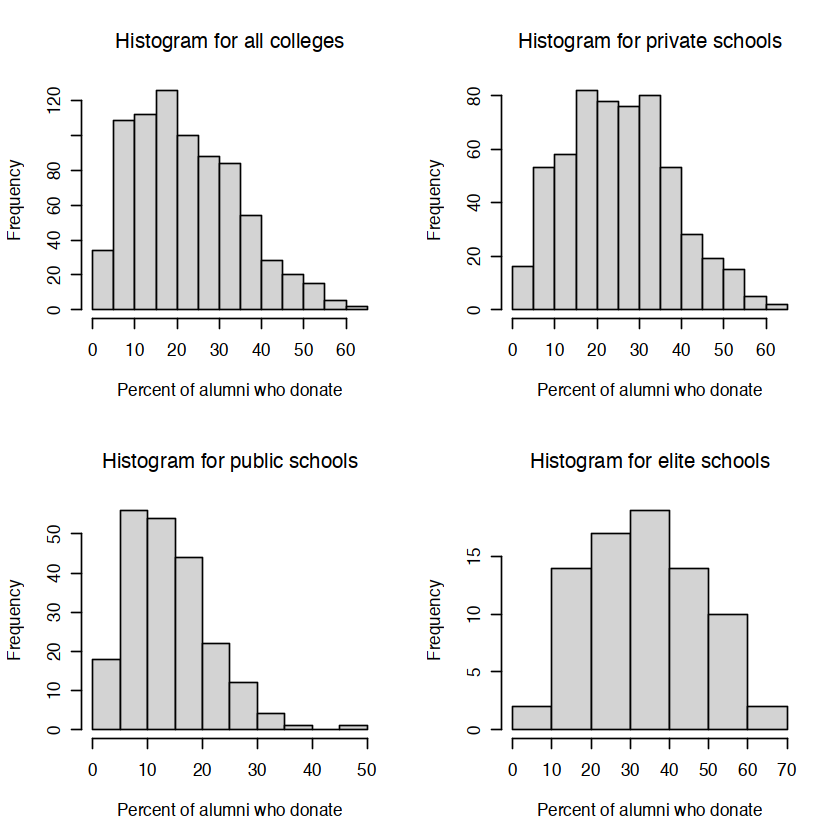

In [31]:
par(mfrow = c(2, 2))
hist(college$perc.alumni, xlab = "Percent of alumni who donate", main = "Histogram for all colleges")
hist(college$perc.alumni[college$Private == 2], xlab = "Percent of alumni who donate", main = "Histogram for private schools")
hist(college$perc.alumni[college$Private == 1], xlab = "Percent of alumni who donate", main = "Histogram for public schools")
hist(college$perc.alumni[college$Elite == "Yes"], xlab = "Percent of alumni who donate", main = "Histogram for elite schools")

Based on the above histograms, private schools and elite schools tend to have a higher percent of alumni who donate.

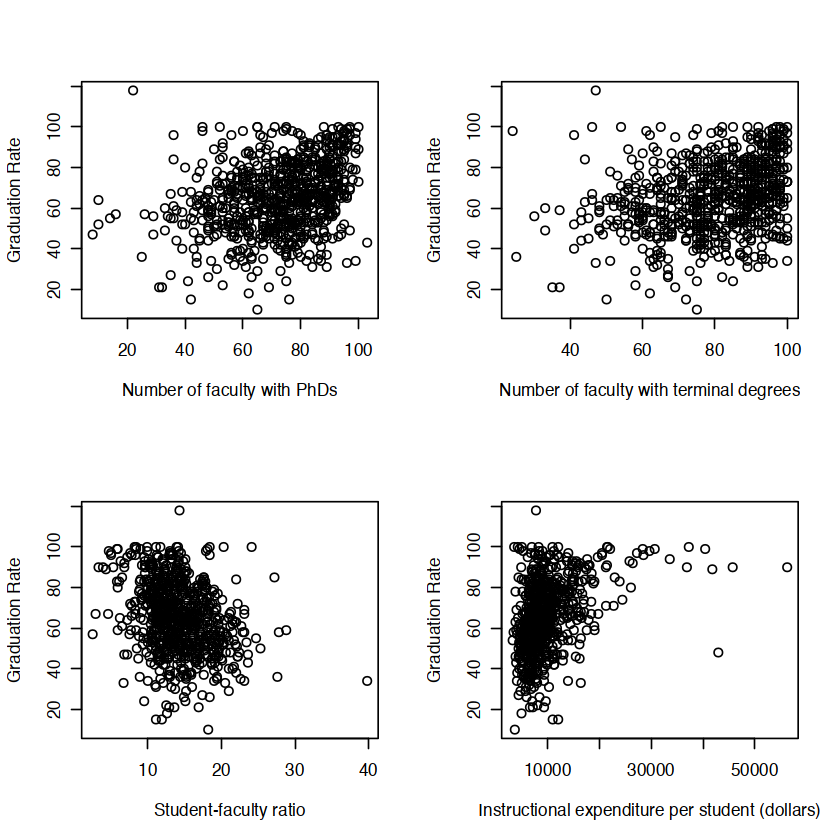

In [32]:
par(mfrow = c(2, 2))
plot(college$PhD, college$Grad.Rate, xlab = "Number of faculty with PhDs", ylab = "Graduation Rate")
plot(college$Terminal, college$Grad.Rate, xlab = "Number of faculty with terminal degrees", ylab = "Graduation Rate")
plot(college$S.F.Ratio, college$Grad.Rate, xlab = "Student-faculty ratio", ylab = "Graduation Rate")
plot(college$Expend, college$Grad.Rate, xlab = "Instructional expenditure per student (dollars)", ylab = "Graduation Rate")

The above scatterplots explore some of the factors which might be related to student graduation rates. From the upper-left plot, it appears there is a weak positive relationship between the number of faculty with PhDs and graduation rates. The upper-right plot appears to indicate that there isn't relationship between the number of faculty with terminal degrees and graduation rates. The bottom-left plot indicates that as student-faculty ratios increase, graduation rates generally tend to decrease. Lastly, the bottom-right plot seems to show that there is a definite positive relationship between instructional expenditure per student and graduation rates, with higher expenditures corresponding to higher graduation rates.

**# Chap 2 Ex 9**

This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

**Part A**

Which of the predictors are quantitative, and which are qualitative?

In [1]:
Auto = read.csv("DataSets/Auto.csv", header = TRUE, na.strings = "?")

#omit NA values from vector
Auto = na.omit(Auto)

dim(Auto)

[1] 392   9

In [2]:
head(Auto)

mpg cylinders displacement horsepower weight acceleration year origin
1 18  8         307          130        3504   12.0         70   1     
2 15  8         350          165        3693   11.5         70   1     
3 18  8         318          150        3436   11.0         70   1     
4 16  8         304          150        3433   12.0         70   1     
5 17  8         302          140        3449   10.5         70   1     
6 15  8         429          198        4341   10.0         70   1     
  name                     
1 chevrolet chevelle malibu
2 buick skylark 320        
3 plymouth satellite       
4 amc rebel sst            
5 ford torino              
6 ford galaxie 500

**Quantitative:**

* `mpg` - Miles per gallon
* `cylinders` - Number of cylinders between 4 and 8
* `displacement` - Engine displacement (cu. inches)
* `horsepower` - Engine horsepower
* `weight` - Vehicle weight (lbs.)
* `acceleration` - Time to accelerate from 0 to 60 mph (sec.)
* `year` - Model year (modulo 100)

**Qualitative:**

* `origin` - Origin of car (1. American, 2. European, 3. Japanese)
* `name` - Vehicle name

**Part B**

What is the range of each quantitative predictor? You can answer this using the range() function.

In [7]:
range(Auto$mpg)

[1]  9.0 46.6

In [8]:
range(Auto$cylinders)

[1] 3 8

In [9]:
range(Auto$displacement)

[1]  68 455

In [10]:
range(Auto$horsepower)

[1]  46 230

In [11]:
range(Auto$weight)

[1] 1613 5140

In [12]:
range(Auto$acceleration)

[1]  8.0 24.8

In [13]:
range(Auto$year)

[1] 70 82

We have the following ranges for each quantitative predictor:

- `mpg` = 37.6
- `cylinders` = 5
- `displacement` = 387
- `horsepower` = 184
- `weight` = 3527
- `acceleration` = 16.8
- `year` = 12

**Part C**

What is the mean and standard deviation of each quantitative predictor?

**Mean of each quantitative predictor**

In [14]:
colMeans(Auto[, 1:7])

mpg    cylinders displacement   horsepower       weight acceleration 
   23.445918     5.471939   194.411990   104.469388  2977.584184    15.541327 
        year 
   75.979592

**Standard deviation of each quantitative predictor**

In [17]:
sapply(Auto[ ,1:7], sd)

mpg    cylinders displacement   horsepower       weight acceleration 
    7.805007     1.705783   104.644004    38.491160   849.402560     2.758864 
        year 
    3.683737

We have the following mean and standard deviation for each quantitative predictor:

- `mpg`: mean = 23.45, standard deviation = 7.81
- `cylinders`: mean = 5.47, standard deviation = 1.71
- `displacement`: mean = 194.41, standard deviation = 104.64
- `horsepower`: mean = 104.47, standard deviation = 38.49
- `weight`: mean = 2977.58, standard deviation = 849.40
- `acceleration`: mean = 15.54, standard deviation = 2.76
- `year`: mean = 75.98, standard deviation = 3.68

**Part D**

Now remove the 10th through 85th observations.
What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [18]:
apply(Auto[-(10:85), 1:7], MARGIN = 2, FUN = "range")

mpg  cylinders displacement horsepower weight acceleration year
[1,] 11.0 3          68           46        1649    8.5         70  
[2,] 46.6 8         455          230        4997   24.8         82

In [23]:
MeanOfPredictors = apply(Auto[-(10:85), 1:7], MARGIN = 2, FUN = "mean")
data.frame(MeanOfPredictors)

MeanOfPredictors
mpg            24.404430     
cylinders       5.373418     
displacement  187.240506     
horsepower    100.721519     
weight       2935.971519     
acceleration   15.726899     
year           77.145570

In [26]:
SdOfPredictors = apply(Auto[-(10:85), 1:7], MARGIN = 2, FUN = "sd")
data.frame(SdOfPredictors)

SdOfPredictors
mpg            7.867283    
cylinders      1.654179    
displacement  99.678367    
horsepower    35.708853    
weight       811.300208    
acceleration   2.693721    
year           3.106217

We have the following range, mean,standard deviation for each quantitative predictor after the 10th through 85th rows have been removed:

- `mpg`: range = 35.6, mean = 24.40, standard deviation = 7.87
- `cylinders`: range = 5, mean = 5.37, standard deviation = 1.65
- `displacement`: range = 387, mean = 187.24, standard deviation = 99.68
- `horsepower`: range = 184, mean = 100.72, standard deviation = 35.71
- `weight`: range = 3348, mean = 2935.97, standard deviation = 811.30
- `acceleration`: range = 16.3, mean = 15.73, standard deviation = 2.69
- `year`: mean = 77.15, standard deviation = 3.11

**Part E**

Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice.
Create some plots highlighting the relationships among the predictors. Comment on your findings.

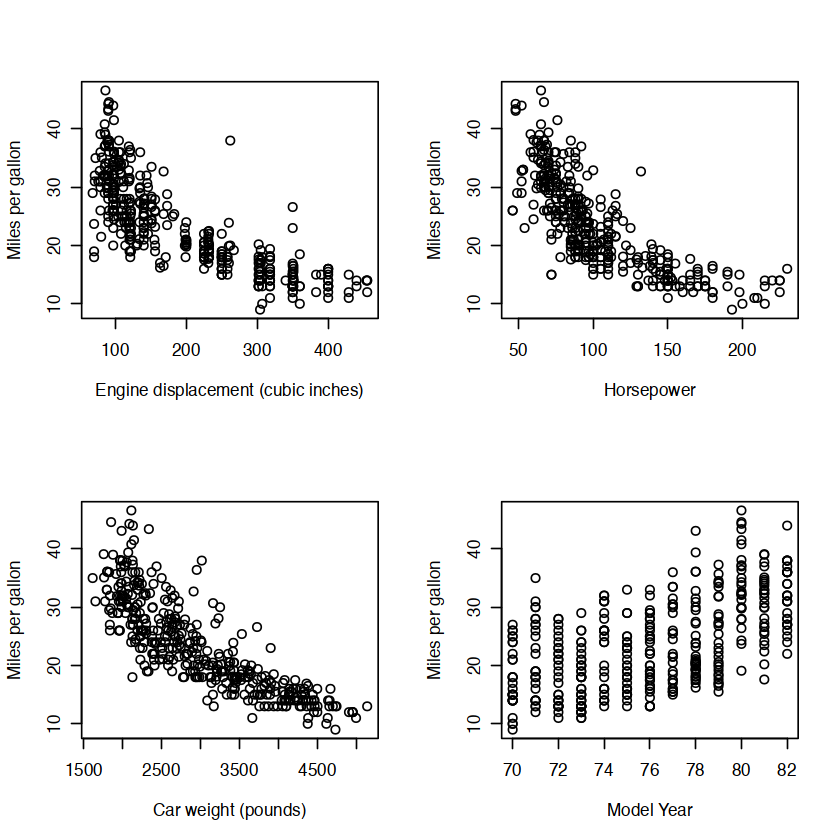

In [27]:
par(mfrow = c(2, 2))
plot(Auto$displacement, Auto$mpg, xlab = "Engine displacement (cubic inches)", ylab = "Miles per gallon")
plot(Auto$horsepower, Auto$mpg, xlab = "Horsepower", ylab = "Miles per gallon")
plot(Auto$weight, Auto$mpg, xlab = "Car weight (pounds)", ylab = "Miles per gallon")
plot(Auto$year, Auto$mpg, xlab = "Model Year", ylab = "Miles per gallon")

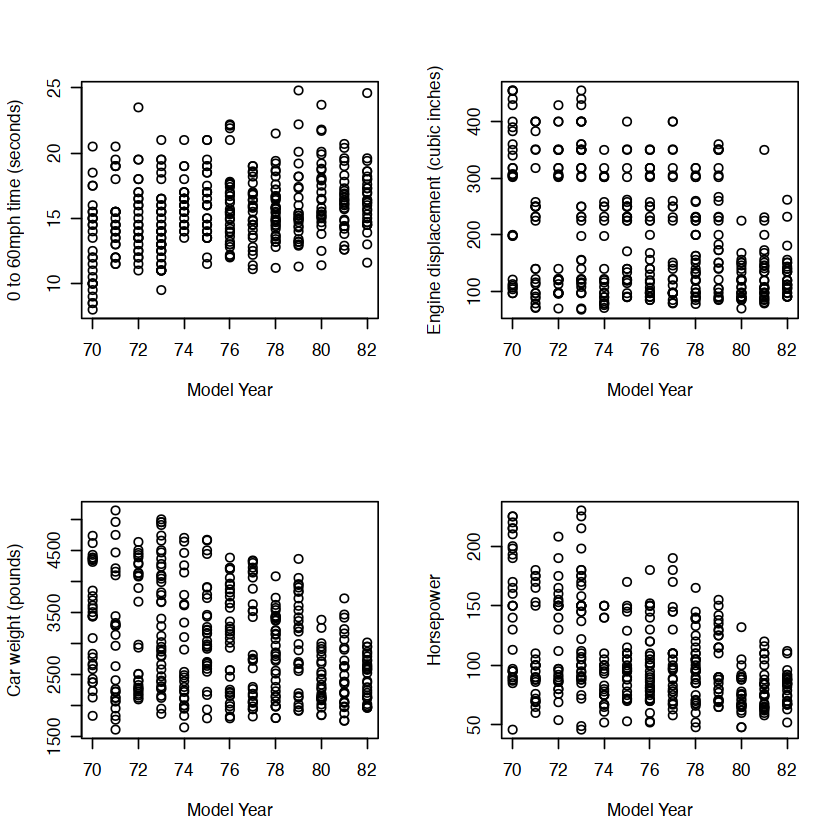

In [28]:
par(mfrow = c(2, 2))
plot(Auto$year, Auto$acceleration, xlab = "Model Year", ylab = "0 to 60mph time (seconds)")
plot(Auto$year, Auto$displacement, xlab = "Model Year", ylab = "Engine displacement (cubic inches)")
plot(Auto$year, Auto$weight, xlab = "Model Year", ylab = "Car weight (pounds)")
plot(Auto$year, Auto$horsepower, xlab = "Model Year", ylab = "Horsepower")

Looking at how various car characteristics change with model year, we see that there aren't any strong relationships. There are still some weak relationships, such as max engine displacement, car weight, and horsepower generally decreasing from 1970 to 1982. From a historical perspective, these changes could be in response to the 1973 and 1979 oil crises, in which spikes in oil prices pushed auto manufacturers to take measures to improve the efficiency of their cars.

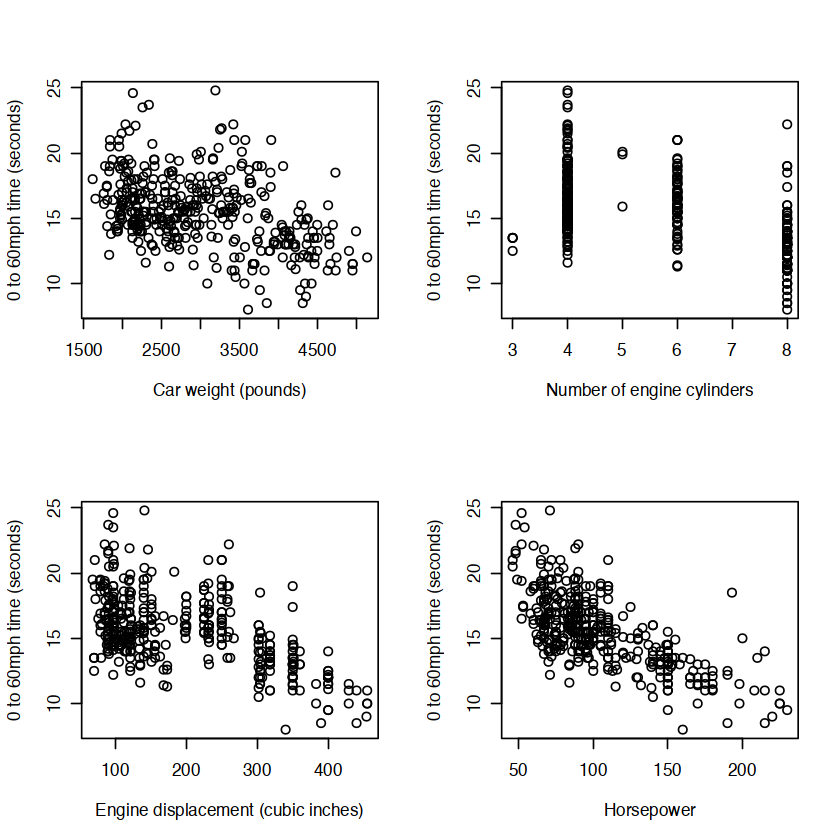

In [29]:
par(mfrow = c(2, 2))
plot(Auto$weight, Auto$acceleration, xlab = "Car weight (pounds)", ylab = "0 to 60mph time (seconds)")
plot(Auto$cylinders, Auto$acceleration, xlab = "Number of engine cylinders", ylab = "0 to 60mph time (seconds)")
plot(Auto$displacement, Auto$acceleration, xlab = "Engine displacement (cubic inches)", ylab = "0 to 60mph time (seconds)")
plot(Auto$horsepower, Auto$acceleration, xlab = "Horsepower", ylab = "0 to 60mph time (seconds)")

Next, I explored the relationship between the number of seconds it takes a car to accelerate from 0 to 60 miles per hour and a number of different factors. As expected, the 0-to-60 time clearly decreases with increased engine displacement and increased horsepower. There is also a weak relationship that as the number of engine cylinders increases the 0-to-60 time tends to decrease. While it may seem counter-intuitive at first, the 0-to-60 time also tends to decrease with car weight. This makes more sense in the context of the two scatterplots below, which shows that the higher weight is correlated with higher horsepower and higher engine displacement.

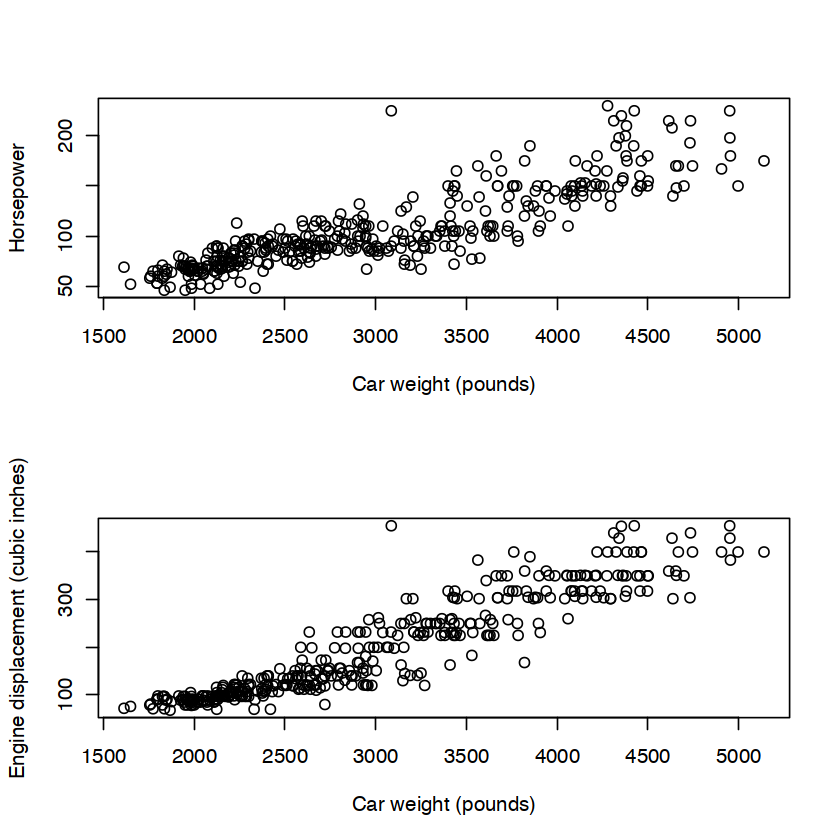

In [30]:
par(mfrow = c(2, 1))
plot(Auto$weight, Auto$horsepower, xlab = "Car weight (pounds)", ylab = "Horsepower")
plot(Auto$weight, Auto$displacement, xlab = "Car weight (pounds)", ylab = "Engine displacement (cubic inches)")

**Part F**

Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables.
Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

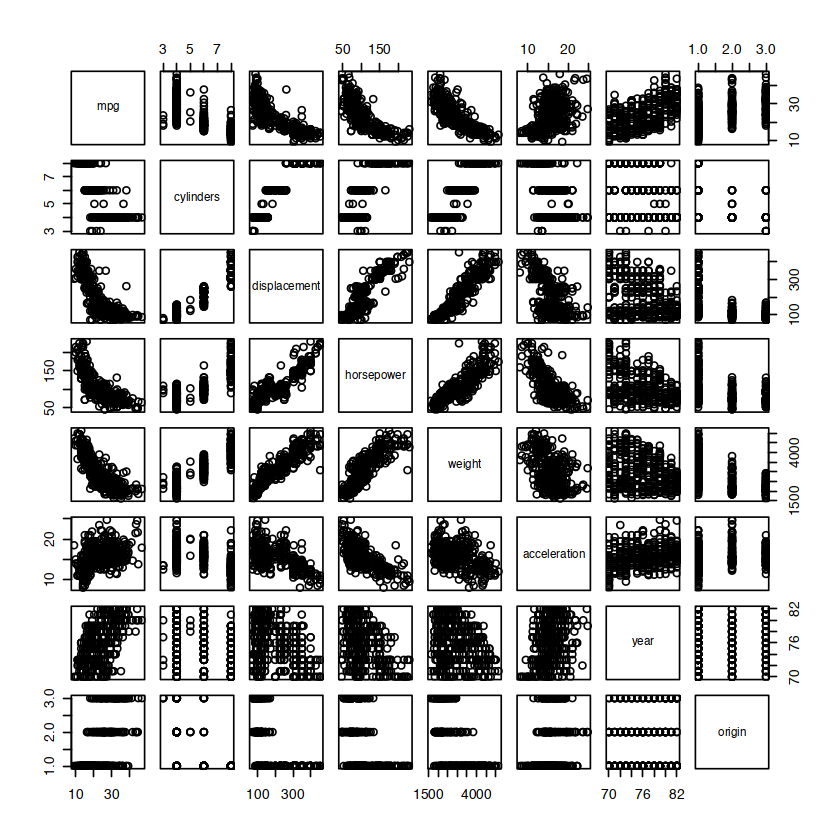

In [32]:
pairs(Auto[,1:8])

Based on the scatter plots I made in part 5 which relate miles per gallon to the predictors engine displacement, horsepower, car weight, and model year, it seems as if the first three factors would be most helpful in predicting `mpg`, with model year still potentially being helpful but less so. There are clear relationships that increasing engine displacement/horsepower/car weight results in decreased fuel efficiency. There is also a weak relationship that fuel efficiency generally increased going from 1970 to 1982.

In [33]:
Auto$origin[Auto$origin == 1] = "American"
Auto$origin[Auto$origin == 2] = "European"
Auto$origin[Auto$origin == 3] = "Japanese"
Auto$origin = as.factor(Auto$origin)

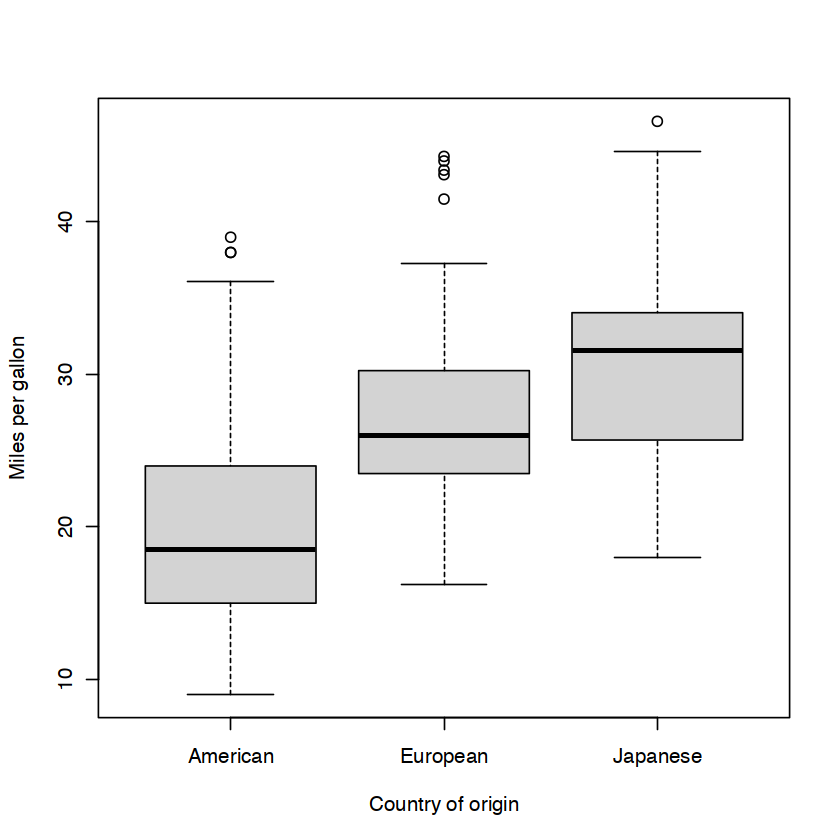

In [34]:
plot(Auto$origin, Auto$mpg, xlab = "Country of origin", ylab = "Miles per gallon")

Looking at the above box plot, we can also see that there is a relationship between a car's country of origin and fuel efficiency, where on average Japanese cars are the most efficient, followed by European cars and then by American cars.

**# Chap 2 Ex 10**

This exercise involves the Boston housing data set.

**Part A**

To begin, load in the Boston data set. The Boston data set is
part of the ISLR2 library.

In [41]:
?Boston

Boston                  package:ISLR2                  R Documentation

_B_o_s_t_o_n _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     A data set containing housing values in 506 suburbs of Boston.

_U_s_a_g_e:

     Boston
     
_F_o_r_m_a_t:

     A data frame with 506 rows and 13 variables.

     ‘crim’ per capita crime rate by town.

     ‘zn’ proportion of residential land zoned for lots over 25,000
          sq.ft.

     ‘indus’ proportion of non-retail business acres per town.

     ‘chas’ Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

     ‘nox’ nitrogen oxides concentration (parts per 10 million).

     ‘rm’ average number of rooms per dwelling.

     ‘age’ proportion of owner-occupied units built prior to 1940.

     ‘dis’ weighted mean of distances to five Boston employment
          centres.

     ‘rad’ index of accessibility to radial highways.

     ‘tax’ full-value property-tax rate per $10,000.

     ‘ptratio’ pup

The columns represent:

* `crim` - Per capita crime rate by town
* `zn` - Proportion of residential land zoned for lots over 25,000 sq.ft.
* `indus` - Proportion of non-retail business acres per town
* `chas` - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `nox` - Nitrogen oxides concentration (parts per 10 million)
* `rm` - Average number of rooms per dwelling
* `age` - Proportion of owner-occupied units built prior to 1940
* `dis` - Weighted mean of distances to five Boston employment centres
* `rad` - Index of accessibility to radial highways
* `tax` - Full-value property-tax rate per \$10,000
* `ptratio` - Pupil-teacher ratio by town
* `lstat` - Lower status of the population (percent)
* `medv` - Median value of owner-occupied homes in $1000s

In [42]:
head(Boston)

crim    zn indus chas nox   rm    age  dis    rad tax ptratio lstat medv
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    4.98  24.0
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    9.14  21.6
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    4.03  34.7
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    2.94  33.4
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    5.33  36.2
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    5.21  28.7

In [43]:
dim(Boston)

[1] 506  13

**Part B**

Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

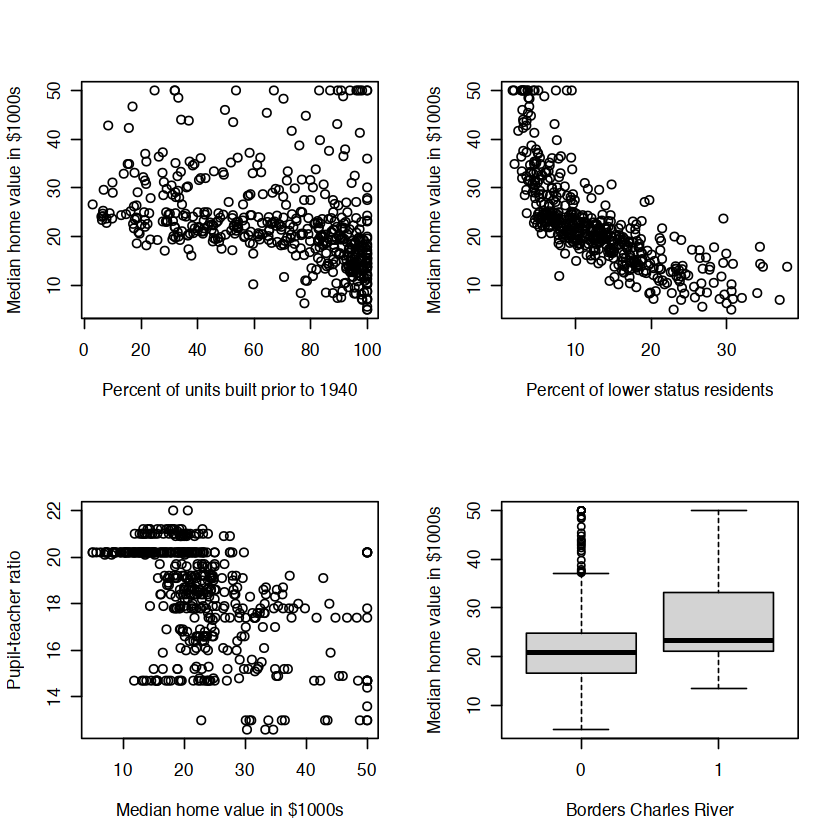

In [48]:
par(mfrow = c(2, 2))
plot(Boston$age, Boston$medv, xlab = "Percent of units built prior to 1940", ylab = "Median home value in $1000s")
plot(Boston$lstat, Boston$medv, xlab = "Percent of lower status residents", ylab = "Median home value in $1000s")
plot(Boston$medv, Boston$ptratio, xlab = "Median home value in $1000s", ylab = "Pupil-teacher ratio")
plot(as.factor(Boston$chas), Boston$medv, xlab = "Borders Charles River", ylab = "Median home value in $1000s")

First, I generated some plots to explore the relationship between median home value and a number of non-crime factors. There aren't any especially clear patterns I can discern from these plots aside from the expected result that as a tracts with higher median home values have a greater proportion of lower-status residence. Also, it appears as if tracts that border the Charles river are a high a slightly higher median home value on average.

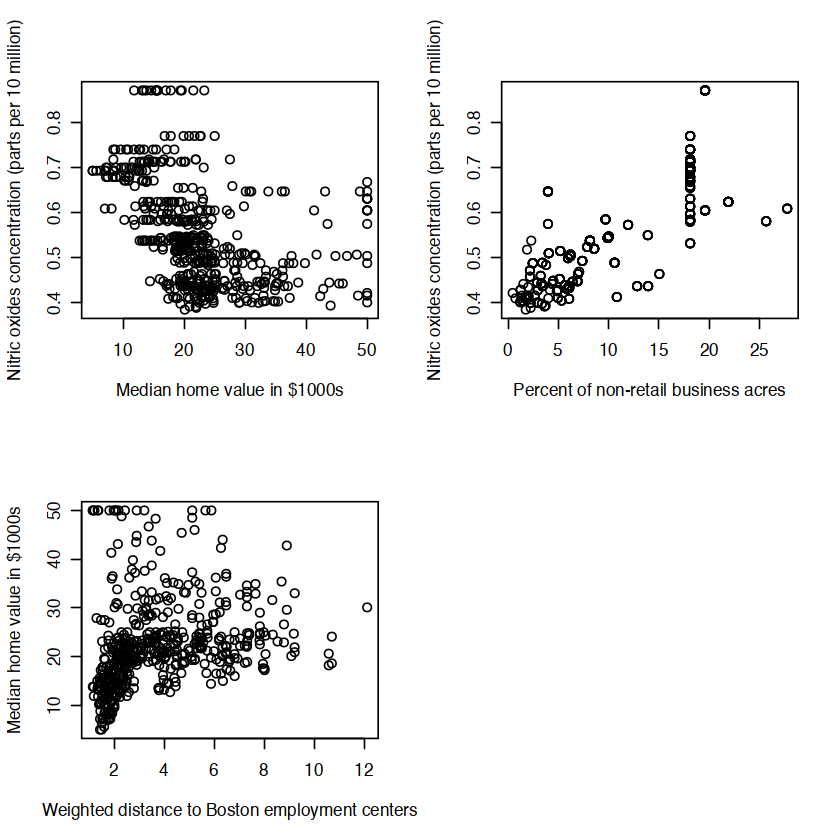

In [50]:
par(mfrow = c(2, 2))
plot(Boston$medv, Boston$nox, xlab = "Median home value in $1000s", ylab = "Nitric oxides concentration (parts per 10 million)")
plot(Boston$indus, Boston$nox, xlab = "Percent of non-retail business acres", ylab = "Nitric oxides concentration (parts per 10 million)")
plot(Boston$dis, Boston$medv, xlab = "Weighted distance to Boston employment centers", ylab = "Median home value in $1000s")

The first two scatter plots explore factors that might relate to the concentration of nitric oxides. While there isn't a strong relationship, it appears that tracts with higher median home value also weakly tend to have lower concentrations of nitric oxides. There is a much clearer relationship with the percentage of non-retail business acres -- tracts with a higher proportion of non-retail business acres tend to have higher concentrations of nitric oxides. The bottom two plots look at some more factors which might be related to the median home value of a tract. 

The bottom-left plot appears to indicate that there is also a relationship between proximity to Boston employment centers and median home value, with home values generally increasing as one gets further away from the employment centers.

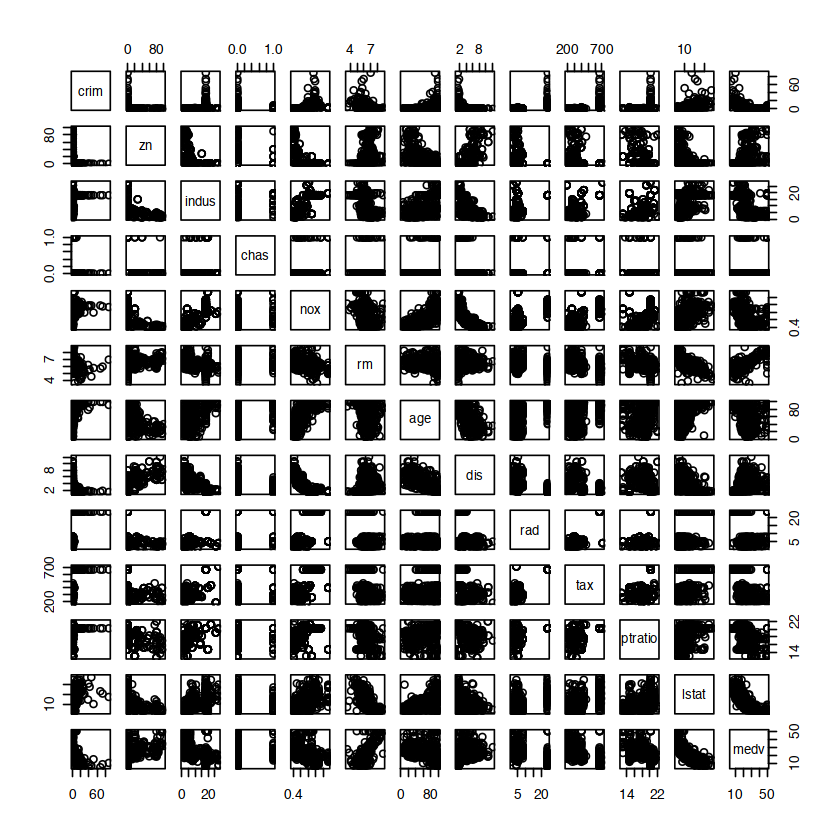

In [49]:
pairs(Boston)

**Part C**

Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

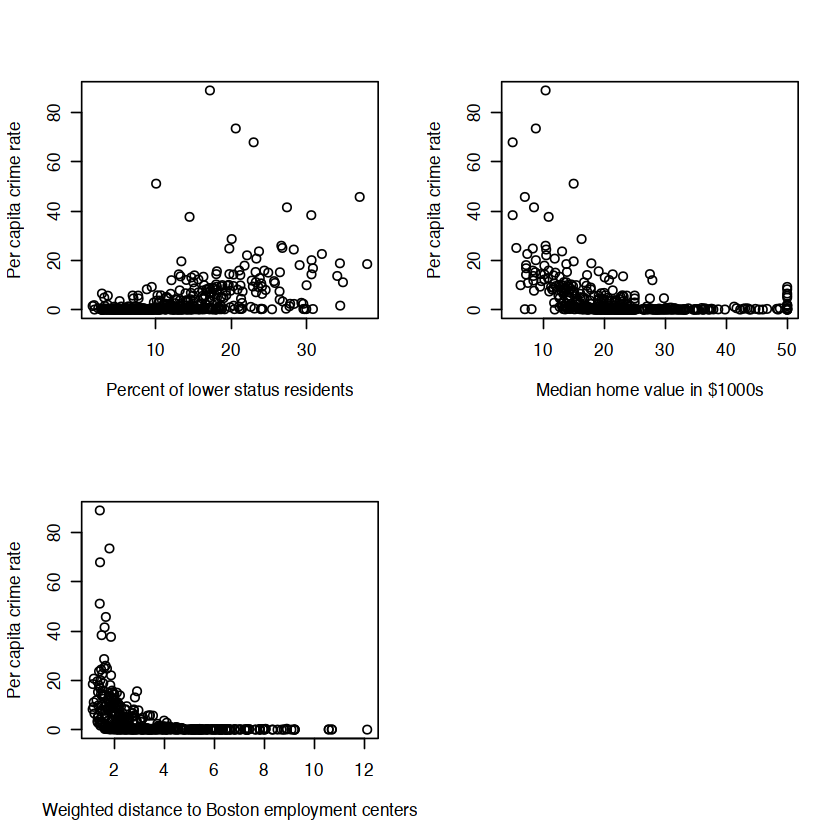

In [51]:
par(mfrow = c(2, 2))
plot(Boston$lstat, Boston$crim, xlab = "Percent of lower status residents", ylab = "Per capita crime rate")
plot(Boston$medv, Boston$crim, xlab = "Median home value in $1000s", ylab = "Per capita crime rate")
plot(Boston$dis, Boston$crim, xlab = "Weighted distance to Boston employment centers", ylab = "Per capita crime rate")

Based on the above 3 scatter plots, it appears that there are pretty clear relationships between crime rate and median home value, percent of lower status residents, and proximity to Boston employment centers. Tracts with lower home values tend to have higher crime rates, as do tracts which are closer to Boston employment centers. In addiion, tracts with higher proportion of lower status residents tend to have higher crime rates.

**Part D**

Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?
Comment on the range of each predictor.

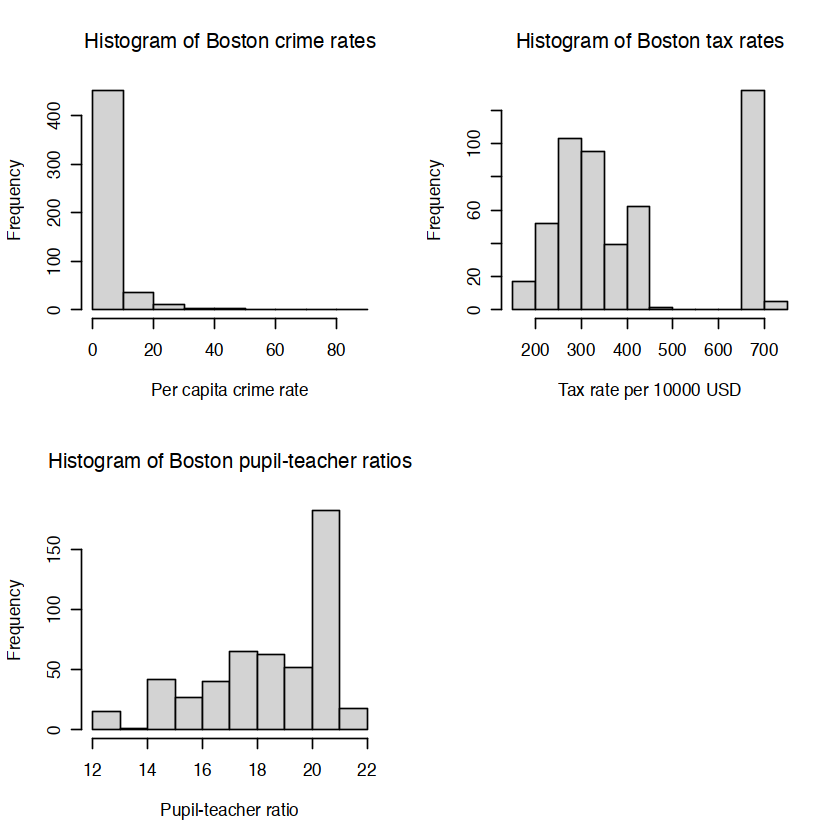

In [52]:
par(mfrow = c(2, 2))
hist(Boston$crim, xlab = "Per capita crime rate", main = "Histogram of Boston crime rates")
hist(Boston$tax, xlab = "Tax rate per 10000 USD", main = "Histogram of Boston tax rates")
hist(Boston$ptratio, xlab = "Pupil-teacher ratio", main = "Histogram of Boston pupil-teacher ratios")

In [54]:
summary(Boston[, c(1, 10, 11)])

      crim               tax           ptratio     
 Min.   : 0.00632   Min.   :187.0   Min.   :12.60  
 1st Qu.: 0.08205   1st Qu.:279.0   1st Qu.:17.40  
 Median : 0.25651   Median :330.0   Median :19.05  
 Mean   : 3.61352   Mean   :408.2   Mean   :18.46  
 3rd Qu.: 3.67708   3rd Qu.:666.0   3rd Qu.:20.20  
 Max.   :88.97620   Max.   :711.0   Max.   :22.00  

Based on the histograms and the numerical summary, there do appear to be tracts within Boston which have particularly high crime rates, tax rates, or pupil-teacher ratios. The minimum crime rate is 0.00632, while the maximum is 88.97620, with a median of 0.25651. The minimum tax rate is \\$187 per \\$10000, while the maximum is \\$711, with a median of \\$330. The minimum pupil-teacher ratio is 12.60 pupils per teacher, while the maximum is 22, with a median of 19.05. Given the median value, the maximum pupil-teacher ratio in the data set isn't outrageously high, since about half of the tracts have a ratio of 19 or more.

**Part E**

How many of the census tracts in this data set bound the Charles river?

In [56]:
sum(Boston$chas)

[1] 35

In this data set, 35 tracts neighbor the Charles river.

**Part F**

What is the median pupil-teacher ratio among the towns in this data set?

In [57]:
summary(Boston$ptratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 

The median pupil-teacher ratio among towns in this data set is 19.05 pupils per teacher.

**Part G**

Which census tract of Boston has lowest median value of owner- occupied homes?
What are the values of the other predictors for that census tract, and how do those values compare to the overall ranges for those predictors?
Comment on your findings.

In [58]:
min(Boston$medv)

[1] 5

In [59]:
Boston[Boston$medv == 5, ]

crim    zn indus chas nox   rm    age dis    rad tax ptratio lstat medv
399 38.3518 0  18.1  0    0.693 5.453 100 1.4896 24  666 20.2    30.59 5   
406 67.9208 0  18.1  0    0.693 5.683 100 1.4254 24  666 20.2    22.98 5

In [60]:
summary(Boston[, c(1:3, 5:13)])

      crim                zn             indus            nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.3850  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :0.8710  
       rm             age              dis              rad        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.127   Max.   :24.000  
      tax           ptratio       

Two of the tracts of South Boston have the lowest median value of owner-occupied homes, at $5000. Both of these tracts have very high crime rates compared to the overall range for that variable, with values 38.3518 and 67.9208 putting them far into the upper quartile and into the range of being outliers. These tracts have no land zoned for residential lots of 25000 sq. ft., though this is in line with at least half of the tracts in the overall set given the median for `ZN` is 0. The two tracts do have a relatively high proportion of non-retail business acres, with values of 18.1 being right at the third quartile. Similarly, the tracts also have concentrations of nitric oxides in the upper quartile of the overall set with a value of 0.693 parts per ten million. The average number of rooms per dwelling for these two tracts is at the low end, with values of 5.453 and 5.683 putting them at the bottom quartile. Next, these two tracts are among those with the highest proportion of owner-occupied homes built prior to 1940, with a value of 100. The tracts are also quite close Boston employment centers with `DIS` values of 1.4896 and 1.4254 putting them at the bottom quartile. The tracts also are very close to radial highways with the maximum value of `RAD` at 24. Next, the tracts have above average property tax rates, with a value of \\$666 per \\$10000, putting them at the third quartile. The pupil-teacher ratio of 20.2 also puts these tracts at the third quartile. Lastly, the tracts have a high proportion of lower status residents (values of 30.59 and 22.98), putting them in the top quartile of the data.

In summary, these two tracts with the lowest median value of owner-occupied homes have predictors generally at the extreme ends of their respective ranges.

**Part H**

In this data set, how many of the census tracts average more than seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the census tracts that average more than eight rooms per dwelling.

In [61]:
sum(Boston$rm > 7)

[1] 64

In [62]:
sum(Boston$rm > 8)

[1] 13

In [63]:
Boston[Boston$rm > 8, ]

crim    zn indus chas nox    rm    age  dis    rad tax ptratio lstat medv
98  0.12083  0  2.89 0    0.4450 8.069 76.0 3.4952  2  276 18.0    4.21  38.7
164 1.51902  0 19.58 1    0.6050 8.375 93.9 2.1620  5  403 14.7    3.32  50.0
205 0.02009 95  2.68 0    0.4161 8.034 31.9 5.1180  4  224 14.7    2.88  50.0
225 0.31533  0  6.20 0    0.5040 8.266 78.3 2.8944  8  307 17.4    4.14  44.8
226 0.52693  0  6.20 0    0.5040 8.725 83.0 2.8944  8  307 17.4    4.63  50.0
227 0.38214  0  6.20 0    0.5040 8.040 86.5 3.2157  8  307 17.4    3.13  37.6
233 0.57529  0  6.20 0    0.5070 8.337 73.3 3.8384  8  307 17.4    2.47  41.7
234 0.33147  0  6.20 0    0.5070 8.247 70.4 3.6519  8  307 17.4    3.95  48.3
254 0.36894 22  5.86 0    0.4310 8.259  8.4 8.9067  7  330 19.1    3.54  42.8
258 0.61154 20  3.97 0    0.6470 8.704 86.9 1.8010  5  264 13.0    5.12  50.0
263 0.52014 20  3.97 0    0.6470 8.398 91.5 2.2885  5  264 13.0    5.91  48.8
268 0.57834 20  3.97 0    0.5750 8.297 67.0 2.4216  5  264 13.0    7.44  50.0
365 3.47428  0 18.10 1    0.7180 8.780 82.9 1.9047 24  666 20.2    5.29  21.9

In [64]:
summary(Boston[Boston$rm > 8, c(1:3, 5:13)])

      crim               zn            indus             nox        
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.4161  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.5040  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.5070  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078   Mean   :0.5392  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.6050  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :0.7180  
       rm             age             dis             rad        
 Min.   :8.034   Min.   : 8.40   Min.   :1.801   Min.   : 2.000  
 1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288   1st Qu.: 5.000  
 Median :8.297   Median :78.30   Median :2.894   Median : 7.000  
 Mean   :8.349   Mean   :71.54   Mean   :3.430   Mean   : 7.462  
 3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652   3rd Qu.: 8.000  
 Max.   :8.780   Max.   :93.90   Max.   :8.907   Max.   :24.000  
      tax           ptratio          lstat           me

From the numerical summary, one thing that stands out is that the tracts which average at least eight rooms per dwelling have low crime rates, low concentrations of nitric oxides and low proportions of lower status residents compared to the overall data set.

**# Chap 3 Ex 8**

This question involves the use of simple linear regression on the Auto data set.

**Part A**

**Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output. For example:**

1. **Is there a relationship between the predictor and the response.**
2. **How strong is the relationship between the predictor and the response?**
3. **Is the relationship between the predictor and the response positive or negative.**

In [3]:
Auto = read.csv("DataSets/Auto.csv", header = TRUE, na.strings = "?")
Auto = na.omit(Auto)

In [4]:
autofit = lm(mpg ~ horsepower, data = Auto)
summary(autofit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


Simple linear regression gives a model $\hat{Y} = 39.935861 - 0.157845X_1$ between the predictor `horsepower` and the response `mpg`. A p-value of essentially zero for $\hat{\beta}_1 = -0.157845$ gives very strong evidence that there is a relationship between `mpg` and `horsepower`Since $R^2 = 0.6059$, approximately 60.6% of the variability in `mpg` is explained by a linear regression onto `horsepower`. This is a modest relationship between the predictor and the response. The value of $\hat{\beta}_1$ itself indicates that in the model each increase of 1 horsepower results on average in a decrease of 0.157845 miles per gallon. In other words, in this model there is a negative relationship between the predictor and the response. 

4. **What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?**

In [5]:
predict(autofit, data.frame(horsepower = 98), interval = "confidence")

fit      lwr      upr     
1 24.46708 23.97308 24.96108

In [6]:
predict(autofit, data.frame(horsepower = 98), interval = "prediction")

fit      lwr     upr     
1 24.46708 14.8094 34.12476

Plugging in a `horsepower` value of 98 gives a predicted `mpg` of 24.46708. The 95% confidence interval for this prediction is (23.97308, 24.96108) and the 95% prediction interval is (14.8094, 34.12467)

**Part B**

Plot the response and the predictor. Use the abline() function to display the least squares regression line.

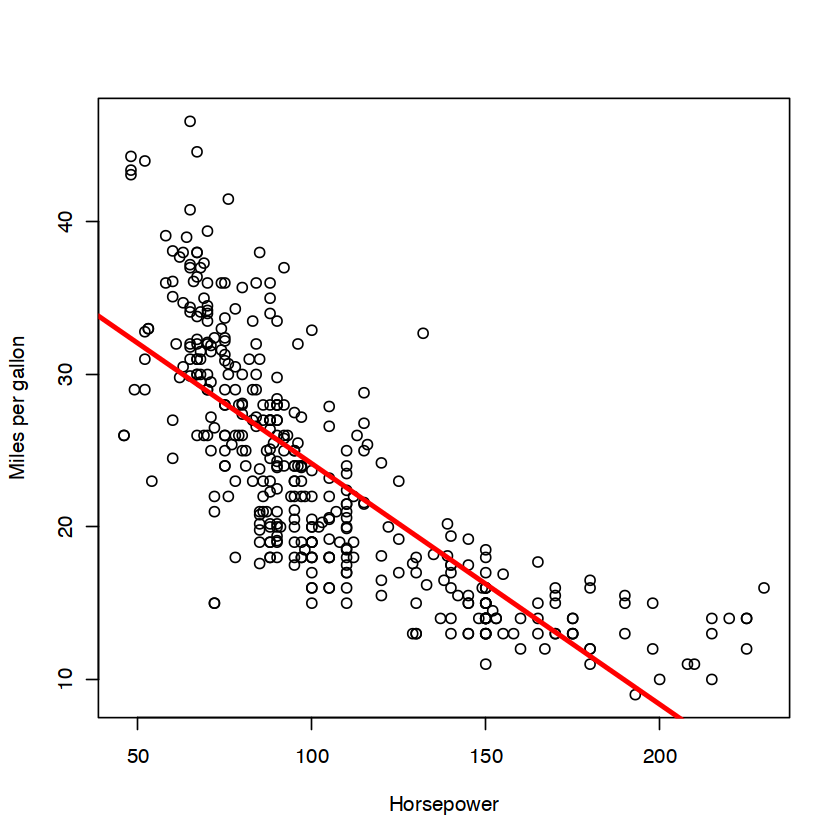

In [9]:
plot(Auto$horsepower, Auto$mpg, xlab = "Horsepower", ylab = "Miles per gallon")
abline(autofit, lwd = 3, col = "red")

**Part C**

Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

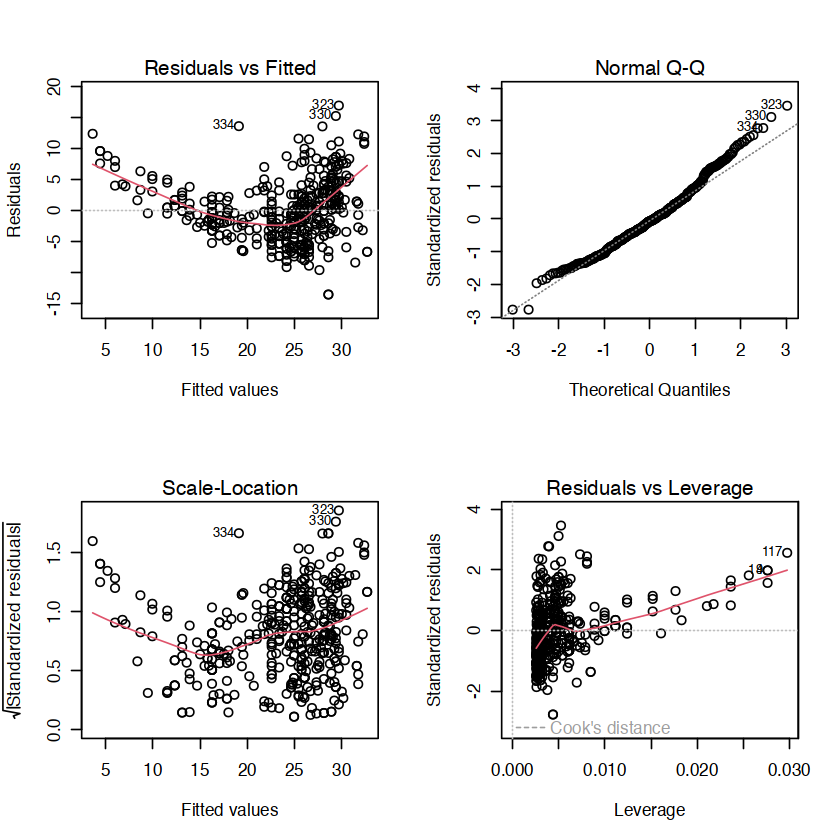

In [10]:
par(mfrow = c(2, 2))
plot(autofit)

Looking at the Residuals vs. Fitted plot, there is a clear U-shape to the residuals, which is a strong indicator of non-linearity in the data. This, when combined with an inspection of the plot in Part 2, tells us that the simple linear regression model is not a good fit. In addition, when looking at the Residuals vs. Leverage plot, there are some high leverage points , which is also a concern for the simple linear regression model. There are also a number of observations with a standardized residual value of 3 or more, which is evidence to suggest that they would be possibile outliers if we didn't already have the suspicion that the data is non-linear.

**# Chap 4 Ex 13**

This question should be answered using the Weekly data set, which is part of the ISLR2 package.
This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [11]:
head(Weekly)

Year Lag1   Lag2   Lag3   Lag4   Lag5   Volume    Today  Direction
1 1990  0.816  1.572 -3.936 -0.229 -3.484 0.1549760 -0.270 Down     
2 1990 -0.270  0.816  1.572 -3.936 -0.229 0.1485740 -2.576 Down     
3 1990 -2.576 -0.270  0.816  1.572 -3.936 0.1598375  3.514 Up       
4 1990  3.514 -2.576 -0.270  0.816  1.572 0.1616300  0.712 Up       
5 1990  0.712  3.514 -2.576 -0.270  0.816 0.1537280  1.178 Up       
6 1990  1.178  0.712  3.514 -2.576 -0.270 0.1544440 -1.372 Down

**Part A**

Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [12]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

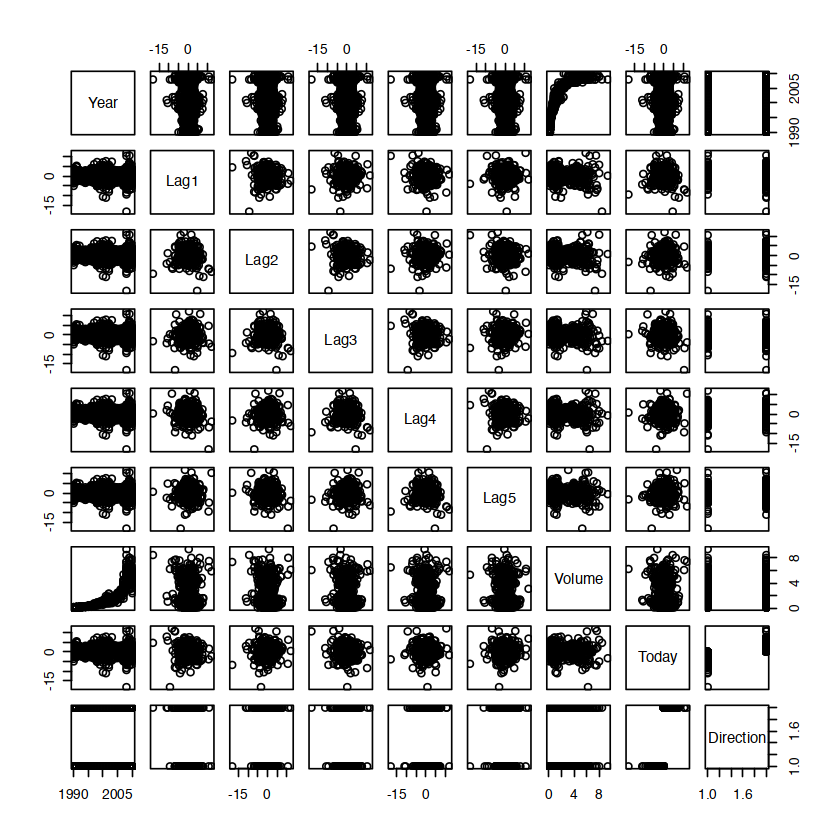

In [13]:
pairs(Weekly)

From the initial summary statistics and scatterplot matrix, there don't appear to be any obvious patterns aside from the fact the volume of shares traded each week has grown quite a lot from 1990 to 2010. Looking more closely at the scatterplot of just volume over time, we can see that the number of shares traded each week has grown exponentially over the 21 years covered by the data.

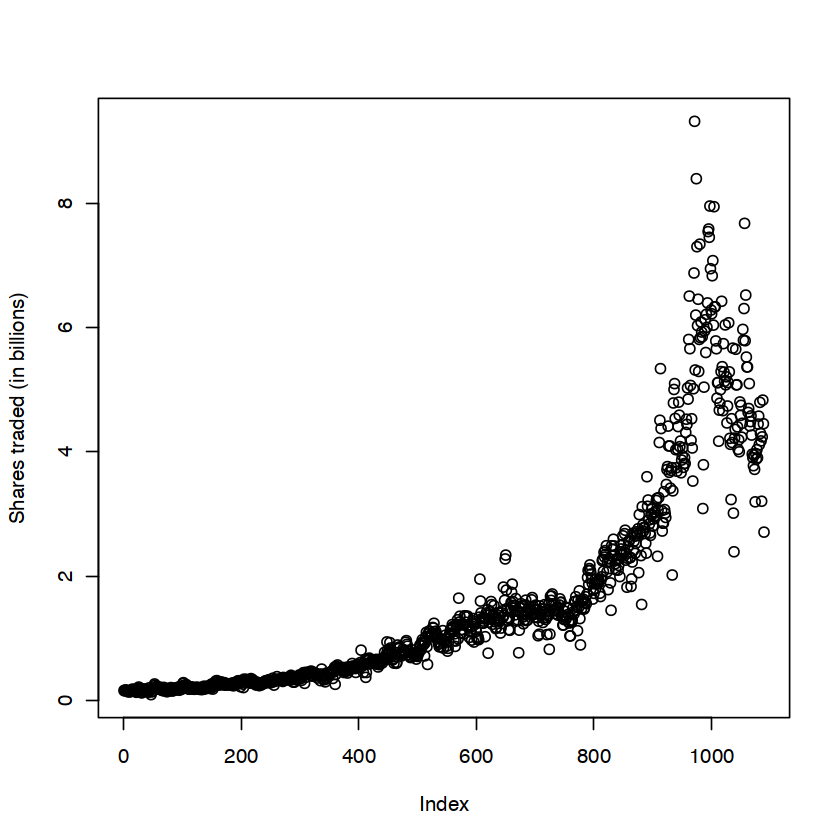

In [14]:
plot(Weekly$Volume, ylab = "Shares traded (in billions)")

In [15]:
cor(Weekly[-9])

Year        Lag1         Lag2        Lag3        Lag4        
Year    1.00000000 -0.032289274 -0.03339001 -0.03000649 -0.031127923
Lag1   -0.03228927  1.000000000 -0.07485305  0.05863568 -0.071273876
Lag2   -0.03339001 -0.074853051  1.00000000 -0.07572091  0.058381535
Lag3   -0.03000649  0.058635682 -0.07572091  1.00000000 -0.075395865
Lag4   -0.03112792 -0.071273876  0.05838153 -0.07539587  1.000000000
Lag5   -0.03051910 -0.008183096 -0.07249948  0.06065717 -0.075675027
Volume  0.84194162 -0.064951313 -0.08551314 -0.06928771 -0.061074617
Today  -0.03245989 -0.075031842  0.05916672 -0.07124364 -0.007825873
       Lag5         Volume      Today       
Year   -0.030519101  0.84194162 -0.032459894
Lag1   -0.008183096 -0.06495131 -0.075031842
Lag2   -0.072499482 -0.08551314  0.059166717
Lag3    0.060657175 -0.06928771 -0.071243639
Lag4   -0.075675027 -0.06107462 -0.007825873
Lag5    1.000000000 -0.05851741  0.011012698
Volume -0.058517414  1.00000000 -0.033077783
Today   0.011012698 -0.03307778  1.000000000

Lastly, we look at the matrix of correlations between the variables.
Looking at the last row, we can see that each of the lag variables is only correlated very weakly with today's returns.
The sole substantial value of 0.842, between `Volume` and `Year`, aligns with the strong correlation we saw in the above scatterplot.

**Part B**

Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors.
Use the summary function to print the results.
Do any of the predictors appear to be statistically significant? If so, which ones?

In [17]:
glmfull = glm(Direction ~ . - Year - Today, data = Weekly, family = "binomial")
summary(glmfull)


Call:
glm(formula = Direction ~ . - Year - Today, family = "binomial", 
    data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The only statistically significant predictor is `Lag2`, with a p-value of 0.0296 providing evidence at the 5% significance level to reject the null hypothesis that it is not related to the response `Direction`.
None of the other predictors are statistically significant, though `Lag1` is somewhat near the border of being significant at the 10% level, with a p-value of 0.1181.

**Part C**

Compute the confusion matrix and overall fraction of correct predictions.
Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [18]:
glmfullprobs = predict(glmfull, type = "response")
glmfullpred = rep("Down", 1089)
glmfullpred[glmfullprobs > 0.5] = "Up"
table(glmfullpred, Weekly$Direction)

           
glmfullpred Down  Up
       Down   54  48
       Up    430 557

In [19]:
mean(glmfullpred == Weekly$Direction)

[1] 0.5610652

As we can see in the confusion matrix, the logistic regression model using the five lag variables along with `Volume` as the predictors, and a prediction threshold of 0.5, correctly predicted 54 down weeks out of a total of 484 actual down weeks and 557 up days out of a total of 605 actual up weeks. This means that the model correctly predicted the direction for 611 weeks out of the 1089 for an accuracy of 0.5612. While this seems to be better than random chance, it is important to note that the model was trained on the entire data set, so 0.5612 is the *training* accuracy. Moreover, a naive strategy of simply saying that every week will be an up week would have resulted in 605 correctly predicted weeks out of 1089, which is a very similar level of overall accuracy.

To look a little closer at the confusion matrix, let's assume that our goal is to correctly predict when the market will go up. In this case, up weeks will be considered as positive ($+$) and down weeks as negative ($-$). Having set this convention, we can now consider four important quantities associated with the confusion matrix: true positive rate (i.e. *sensitivity* or *recall*), false positive rate, positive predictive value (i.e. *precision*), and negative predictive value. The true positive rate is the number of correctly predicted positives divided by the overall number of positives -- the number of correctly predicted up weeks (557) over the total number of up weeks (605) for a value of $557/605 \approx 0.92$ for this model. While this is a pretty high value, which is good, the false positive rate -- the number of incorrectly predicted positives (weeks incorrectly predicted to be up weeks = 430 weeks) divided by the overall number of negatives (the total number of down weeks = 484 weeks) -- is comparably high at $430/484 \approx 0.888$, which might be quite bad depending on our sensitivity to losing money on an incorrectly predicted down week. Next is the positive predictive value, which is the number of true positives divided by the total number of predicted positives; in our case this is $557/987 \approx 0.564$. This is better than chance, but as already noted we would have a comparable positive predictive value if we just predicted that every week would be an up week. Lastly is the negative predictive value, which is the number of true negatives divided by the total number of predicted negatives; in our case this is $54/102 \approx 0.529$. 

**Part D**

Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.
Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [20]:
train = (Weekly$Year < 2009)

In [21]:
glmfit = glm(Direction ~ Lag2, data = Weekly, subset = train, family = "binomial")
summary(glmfit)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [22]:
glmprobs = predict(glmfit, Weekly[!train, ], type = "response")
glmpred = rep("Down", dim(Weekly[!train, ])[1])
glmpred[glmprobs > 0.5] = "Up"
table(glmpred, Weekly[!train, ]$Direction)

       
glmpred Down Up
   Down    9  5
   Up     34 56

In [23]:
mean(glmpred == Weekly[!train, ]$Direction)

[1] 0.625

In [24]:
mean(Weekly[!train, ]$Direction == "Up")

[1] 0.5865385

After fitting a logistic regression model on the data from 1990 through 2008 using only Lag2 as the predictor, the model correctly predicted the market direction for 62.5% of the weeks in the held-out data (the data from 2009 and 2010). While this is better than chance, it still is less than a 10% improvement over naively predicting that every week will be an up week. Continuing with the convention from Part 3 that an up week is a positive result, the true positive rate is 56/61≈0.91856/61≈0.918, while the false positive rate is 34/43≈0.79134/43≈0.791. In addition, the positive predictive value is 56/90≈0.62256/90≈0.622 and the negative predictive value is 9/14≈0.6439/14≈0.643.

**Part E**

Repeat (D) using LDA.

In [32]:
ldafit = lda(Direction ~ Lag2, data = Weekly, subset = train)
ldafit

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [33]:
ldapred = predict(ldafit, Weekly[!train, ])
table(ldapred$class, Weekly[!train, ]$Direction)

      
       Down Up
  Down    9  5
  Up     34 56

In [34]:
mean(ldapred$class == Weekly[!train, ]$Direction)

[1] 0.625

After performing linear discriminant analysis on the data from 1990 through 2008 using only Lag2 as the predictor, we ended up with an identical confusion matrix to the one from Part 4 with the logistic regression model. As we saw in Part 4, the model correctly predicted the market direction for 62.5% of the weeks in the held-out data (the data from 2009 and 2010). While this is better than chance, it still is less than a 10% improvement over naively predicting that every week will be an up week. Continuing with the convention from Part 3 that an up week is a positive result, the true positive rate is 56/61≈0.91856/61≈0.918, while the false positive rate is 34/43≈0.79134/43≈0.791. In addition, the positive predictive value is 56/90≈0.62256/90≈0.622 and the negative predictive value is 9/14≈0.6439/14≈0.643.

**Part F**

Repeat (D) using QDA.

In [35]:
qdafit = qda(Direction ~ Lag2, data = Weekly, subset = train)
qdafit

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [37]:
qdapred = predict(qdafit, Weekly[!train, ])
table(qdapred$class, Weekly[!train, ]$Direction)

      
       Down Up
  Down    0  0
  Up     43 61

In [38]:
mean(qdapred$class == Weekly[!train, ]$Direction)

[1] 0.5865385

After performing quadratic discriminant analysis on the data from 1990 through 2008 using only Lag2 as the predictor, we ended up with a model that ended up predicting that every week in 2009 and 2010 would be an up week. The model correctly predicted the market direction for 58.7% of the weeks in the held-out data (the data from 2009 and 2010). While this is better than chance, it is the same result one would get from naively predicting that every week will be an up week, so to better compare the performance of this model to the logistic regression and linear discriminant analysis models testing on a larger test set would be necessary. Continuing with the convention from Part 3 that an up week is a positive result, the true positive rate is 61/61=1, while the false positive rate is 43/43≈1. In addition, the positive predictive value is 61/104≈0.587 and since there were no negative predictions discussing the negative predictive value is meaningless.

**Part G**

Repeat (D) using KNN with K = 1.

In [39]:
trainX = data.frame(Weekly[train, ]$Lag2)
testX = data.frame(Weekly[!train, ]$Lag2)
trainDirection = Weekly[train, ]$Direction

In [42]:
set.seed(1)
knnpred = knn(trainX, testX, trainDirection, k = 1)
table(knnpred, Weekly[!train, ]$Direction)

       
knnpred Down Up
   Down   21 30
   Up     22 31

In [43]:
mean(knnpred == Weekly[!train, ]$Direction)

[1] 0.5

After performing 𝑘k-nearest neighbors classification with k=1 on the data from 1990 through 2008 using only Lag2 as the predictor, the model correctly predicted the market direction for 50% of the weeks in the held-out data (the data from 2009 and 2010). While this only as good as picking the direction randomly, it had worse performance than naively predicting that every week will be an up week. Continuing with the convention from Part 3 that an up week is a positive result, the true positive rate is 31/61≈0.508, while the false positive rate is 22/43≈0.512. In addition, the positive predictive value is 31/53≈0.585 and the negative predictive value is 21/51≈0.412

**Part H**

Repeat (D) using naive Bayes.

**Part I**

Which of these methods appears to provide the best results on this data?

If we are only considering overall prediction accuracy, it appears that logistic regression and linear discriminant analysis were equally good as the models that performed the best on this data. Quadratic discriminant analysis came in third place, and k-nearest neighbors with k=1 a distant fourth. As noted above in Part 7, k-nearest neighbors didn't perform any better than randomly guessing, and in fact performed worse than naively predicting every week would be an up week. One thing that I would be cautious of, though, is the fact that aside from KNN, the other three models very strongly preferred to predict up weeks, and therefore had high false positive rates. This might be okay for an investor who is comfortable with taking more risks and has can afford losing money to down weeks that were incorrectly predicted to be up weeks, but a risk-averse investor would probably want to use a less aggressive model, or at least require a higher probability threshold than 50% before accepting a prediction of an up week.

**Part J**

Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods.
Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data.
Note that you should also experiment with values for K in the KNN classifier.

The combination of predictors I will try out is a weighted average of the lag variables where the recent lag values are weighted more heavily than the ones further in the past.
More specifically, I will try out giving Lag1 a weight of 40%, Lag2 a weight of 35%, Lag3 a weight of 15%, and Lag4 and Lag5 each weights of 5%.
Note that I don't have a strong reason for these particular values of the weights aside from the intuitive assumption that recent weeks might be more-related to the direction of the current week than weeks that are further in the past.

In [44]:
weightedlagavg = 0.4*Weekly$Lag1 + 0.35*Weekly$Lag2 + 0.15*Weekly$Lag3 + 0.05*Weekly$Lag4 + 0.05*Weekly$Lag5
Weekly = data.frame(Weekly, weightedlagavg)
head(Weekly)

Year Lag1   Lag2   Lag3   Lag4   Lag5   Volume    Today  Direction
1 1990  0.816  1.572 -3.936 -0.229 -3.484 0.1549760 -0.270 Down     
2 1990 -0.270  0.816  1.572 -3.936 -0.229 0.1485740 -2.576 Down     
3 1990 -2.576 -0.270  0.816  1.572 -3.936 0.1598375  3.514 Up       
4 1990  3.514 -2.576 -0.270  0.816  1.572 0.1616300  0.712 Up       
5 1990  0.712  3.514 -2.576 -0.270  0.816 0.1537280  1.178 Up       
6 1990  1.178  0.712  3.514 -2.576 -0.270 0.1544440 -1.372 Down     
  weightedlagavg
1  0.10055      
2  0.20515      
3 -1.12070      
4  0.58290      
5  1.15560      
6  1.10520

In [45]:
cor(Weekly$Today, Weekly$weightedlagavg)

[1] -0.03724141

Computing the correlation between this weighted average and the value of the current week's return, we see that there only a very weak correlation between the two quantities.
It is smaller in magnitude than the correlations between Today and the first the lag variables individually.
That seems to suggest that this weighting might not be too useful, but I will still try out each of the classification methods using this transformation of the predictors.
I will start out with logistic regression.

In [46]:
glmfit = glm(Direction ~ weightedlagavg, data = Weekly, subset = train, family = "binomial")
summary(glmfit)


Call:
glm(formula = Direction ~ weightedlagavg, family = "binomial", 
    data = Weekly, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.264   1.074   1.092   1.127  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.21349    0.06446   3.312 0.000926 ***
weightedlagavg -0.02816    0.05347  -0.527 0.598508    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1354.4  on 983  degrees of freedom
AIC: 1358.4

Number of Fisher Scoring iterations: 3


In [47]:
glmprobs = predict(glmfit, Weekly[!train, ], type = "response")
glmpred = rep("Down", dim(Weekly[!train, ])[1])
glmpred[glmprobs > 0.5] = "Up"
table(glmpred, Weekly[!train, ]$Direction)

       
glmpred Down Up
     Up   43 61

In [48]:
mean(glmpred == Weekly[!train, ]$Direction)

[1] 0.5865385

As we can see, the results with logistic regression aren't particularly encouraing, as with a prediction threshold of 50% this method was equivalent to always predicting that the market would go up when evaluated on the test set.
In addition, the p-value for the coefficient of weighted.lag.avg is 0.598, which means that there isn't evidence to say that it is statistically significant.
Thinking a little more about the idea of using a weighted average, it makes sense that the performance with logistic regression won't provide an improvement over what we did in Part 4, since the weighted average is still a linear combination of the variables.
We already saw that in a logistic regression model, Lag2 was the only statistically significant coefficient, and even then it is borderline at the 5% significance level, so the weighted average includes variables which we already had reason to believe weren't particularly helpful in making a strong model. I'll still try out the remaining methods with weighted.lag.avg before trying out one other combination of the predictors. Next up is linear discriminant analysis.

In [49]:
ldafit = lda(Direction ~ weightedlagavg, data = Weekly, subset = train)

In [50]:
ldapred = predict(ldafit, Weekly[!train, ])
table(ldapred$class, Weekly[!train, ]$Direction)

      
       Down Up
  Down    0  0
  Up     43 61

In [51]:
mean(ldapred$class == Weekly[!train, ]$Direction)

[1] 0.5865385

Linear discriminant analysis has the same performance as logistic regression.
This is reasonable since the two methods often perform similarly.
Now we'll consider quadratic discriminant analysis.

In [52]:
qdafit = qda(Direction ~ weightedlagavg, data = Weekly, subset = train)

In [53]:
qdapred = predict(qdafit, Weekly[!train, ])
table(qdapred$class, Weekly[!train, ]$Direction)

      
       Down Up
  Down    0  0
  Up     43 61

In [54]:
mean(qdapred$class == Weekly[!train, ]$Direction)

[1] 0.5865385

In [55]:
max(qdapred$posterior)

[1] 0.9435257

Quadratic discriminant analysis also performed the same, but when checking the maximum value in the dataframe of posterior probabilities, I noticed that the maximum probability from QDA is 0.943. This means that it could be meaningful to try out a stricter threshold for predicting an up week. I will try out a threshold of 60%.

In [56]:
qdapred60 = rep("Down", dim(Weekly[!train, ])[1])
qdapred60[qdapred$posterior[, "Up"] > 0.6] = "Up"
table(qdapred60, Weekly[!train, ]$Direction)

         
qdapred60 Down Up
     Down   37 48
     Up      6 13

In [57]:
mean(qdapred60 == Weekly[!train, ]$Direction)

[1] 0.4807692

With a somewhat stricter probability threshold of 60% for predicting an up week, we see that our overall prediction accuracy goes down to 48.1%.
However, our false positive rate is now 6/43≈0.14, which is a big improvement over the false positive rate of 1 from Part 6.
In addition, our positive predictive value is 13/19≈0.684, which is also an improvement over the value of 0.587 from Part 6.
This suggests that if we are risk-averse investors who only want to invest our money when there is a pretty good chance of the market going up,
then QDA with our weighted average of the lag variables and a stricter probability threshold could be promising. Last up is 𝑘k-nearest neighbors.

In [62]:
trainX = data.frame(Weekly[train, "weightedlagavg"])
testX = data.frame(Weekly[!train, "weightedlagavg"])
trainDirection = Weekly[train, "Direction"]

In [63]:
set.seed(1)
knnpred = knn(trainX, testX, trainDirection, k = 1)
table(knnpred, Weekly[!train, ]$Direction)

       
knnpred Down Up
   Down   14 28
   Up     29 33

In [64]:
mean(knnpred == Weekly[!train, ]$Direction)

[1] 0.4519231

With K=1, KNN performs even worse than random guessing when it comes to overall prediction accuracy, and the true positive rate (0.541), false positive rate (0.674), and positive predictive rate (0.532) aren't encouraging when compared to the result from Part 8.
Before moving on, let's try out two more values for K=3 and K=5.

In [66]:
set.seed(1)
knnpred = knn(trainX, testX, trainDirection, k = 3)
table(knnpred, Weekly[!train, ]$Direction)

       
knnpred Down Up
   Down   15 28
   Up     28 33

In [67]:
mean(knnpred == Weekly[!train, ]$Direction)

[1] 0.4615385

In [68]:
set.seed(1)
knnpred = knn(trainX, testX, trainDirection, k = 5)
table(knnpred, Weekly[!train, ]$Direction)

       
knnpred Down Up
   Down   13 26
   Up     30 35

In [69]:
mean(knnpred == Weekly[!train, ]$Direction)

[1] 0.4615385

Even when we increase the value of k, the results are largely the same.
While it would be best to compare these different models using additional tools, such as computing ROC curves and AUC scores for each model, I'll save that for Chapter 9 when we discuss how to produce them in R more in depth.
For now, it looks like as far as using weighted.lag.avg to make predictions goes, the most-promising model is QDA with a prediction threshold of 60%.
If I have time to revisit this exercise in the future, I think it would be intersting to try out a different weighting strategy, where each lag variable is weighted based on the number of shares during the corresponding week of trading.

**# Chap 5 Ex 9**

We will now consider the Boston housing data set, from the ISLR2 library.

In [70]:
boston = read.csv("/Users/yaya/Desktop/R/SDA mode B/DataSets/Boston.csv", header = TRUE)
head(boston)

X crim    zn indus chas nox   rm    age  dis    rad tax ptratio lstat medv
1 1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    4.98  24.0
2 2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    9.14  21.6
3 3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    4.03  34.7
4 4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    2.94  33.4
5 5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    5.33  36.2
6 6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    5.21  28.7

**Part A**

Based on this data set, provide an estimate for the population mean of medv. Call this estimate μˆ.

In [71]:
mean(Boston$medv)

[1] 22.53281

The estimated population mean of `medv` is $\hat{\mu} = 22.532$. In other words, the average median home value for this sample is \$22,532.

**Part B**

Provide an estimate of the standard error of μˆ. Interpret this result.
Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [72]:
samplesd = sd(boston$medv)
samplesem = samplesd / sqrt(dim(boston)[1])
samplesem

[1] 0.4088611

Using the usual formula for estimating the standard error, we get a value of 0.408 as our estimate for the standard error of $\hat{\mu}$.
Since `medv` was measured in units of 1,000 USD, this estimate of the standard error translates to \$408. We will further interpret what this estimate of standard error means in Part 4.

**Part C**

Now estimate the standard error of μˆ using the bootstrap. How does this compare to your answer from (B)?

In [75]:
bootfn = function(data, index){
    return(mean(data[index, "medv"]))
}

boot(boston, bootfn, 10000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = boston, statistic = bootfn, R = 10000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 -0.00235664   0.4069471

Using the bootstrap, we have an estimate of 0.406 for the standard error of $\hat{\mu}$. This is very close to the estimate obtained in Part 2.

**Part D**

Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv.
Compare it to the results obtained using t.test(Boston$medv).

***Hint: You can approximate a 95% confidence interval using the formula $[ \hat{\mu} - 2\text{SE}(\hat{\mu}), \hat{\mu} + 2\text{SE}(\hat{\mu}) ]$.***

In [76]:
t.test(boston$medv)


	One Sample t-test

data:  boston$medv
t = 55.111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


Based on our bootstrap estimate from Part 3, a 95% confidence interval for the mean of `medv` is approximately $[22.532 - 2 \times 0.406, \, 22.532 + 2 \times 0.406]$, or $[21.717, \, 23.341]$. This is slightly wider than the confidence interval computed using `t.test()`, since we rounded our critical $t$-value up to 2, when for our data set with 506 observations the actual critical $t$-value is approximately 1.960. The meaning of a 95% confidence interval is that if we repeatedly sampled from the population and used the sample means and estimated standard errors to compute many confidence intervals, approximately 95% of those confidence intervals will contain the actual population mean. In other words, there is a 95% chance that this confidence interval contains the actual population mean of `medv`.

**Part E**

Based on this data set, provide an estimate, μˆmed, for the median value of medv in the population.

In [77]:
median(Boston$medv)

[1] 21.2

The estimated population median of `medv` is $\hat{\mu}_{\text{med}} = 21.2$. In other words, the median of median home values for this sample is \$21,200.

**Part F**

We now would like to estimate the standard error of μˆmed. Unfortunately, there is no simple formula for computing the standard error of the median.
Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

We can use the identical code as in part c), but replacing `mean()` with `median()`:

In [78]:
boot.fn = function(data, index){
    return(median(data[index, "medv"]))
}

boot(boston, boot.fn, 10000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = boston, statistic = boot.fn, R = 10000)


Bootstrap Statistics :
    original    bias    std. error
t1*     21.2 -0.019105    0.378649

Using the bootstrap, we have an estimate of 0.378 for the standard error of $\hat{\mu}_{\text{med}}$.
Based on this bootstrap estimate, a 95% confidence interval for the median of `medv` is approximately $[21.2 - 2 \times 0.378, \, 21.2 + 2 \times 0.378]$, or $[20.448, \, 21.952]$. There is a 95% chance that this confidence interval contains the actual population median of `medv`.

**Part G**

Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts.
Call this quantity μˆ0.1. (You can use the quantile() function.)

In [79]:
quantile(boston$medv, c(0.1))

10% 
12.75

The estimated population tenth percentile of `medv` is $\hat{\mu}_{0.1} = 12.75$. In other words, the tenth percentile of median home values for this sample is \$12,750, or only 10% of observations in this sample have a `medv` value of 12.7 or less.

**Part H**

Use the bootstrap to estimate the standard error of μˆ0.1. Comment on your findings.

In [80]:
boot.fn = function(data, index){
    return(quantile(data[index, "medv"], 0.1))
}

boot(boston, boot.fn, 10000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = boston, statistic = boot.fn, R = 10000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75 0.00784   0.5035756

Using the bootstrap, we have an estimate of 0.504 for the standard error of $\hat{\mu}_{0.1}$. Based on this bootstrap estimate, a 95% confidence interval for the tenth percentile of `medv` is approximately $[12.7 - 2 \times 0.504, \, 12.7 + 2 \times 0.504]$, or $[11.924, \, 13.876]$. There is a 95% chance that this confidence interval contains the actual population tenth percentile of `medv`.

**# Chap 6 Ex 11**

We will now try to predict per capita crime rate in the Boston data set.

**Part A**

Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR.
Present and discuss results for the approaches that you consider.

In [87]:
boston = read.csv("DataSets/Boston.csv", header = TRUE)
head(boston)

X crim    zn indus chas nox   rm    age  dis    rad tax ptratio lstat medv
1 1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    4.98  24.0
2 2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    9.14  21.6
3 3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    4.03  34.7
4 4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    2.94  33.4
5 5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    5.33  36.2
6 6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    5.21  28.7

In [89]:
subset<-sample(nrow(Boston),nrow(Boston)*0.70)
boston.train<-Boston[subset,]
boston.test<-Boston[-subset,]

In [90]:
slr.full<-lm(medv~.,data=boston.train)
slr.predict<-predict(slr.full,boston.test)
slr.MSE<-mean((slr.predict-boston.test$medv)^2)
slr.MSE

[1] 20.20296

Full model

In [91]:
slr.full<-lm(medv~.,data=boston.train)
slr.predict<-predict(slr.full,boston.test)
slr.MSE<-mean((slr.predict-boston.test$medv)^2)
slr.MSE

[1] 20.20296

Best Subset

In [92]:
bsm<-regsubsets(medv~.,data=boston.train,nbest=1,nvmax=13)
summary(bsm)

Subset selection object
Call: regsubsets.formula(medv ~ ., data = boston.train, nbest = 1, 
    nvmax = 13)
13 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          crim zn  indus chas nox rm  age dis rad tax ptratio black lstat
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     " "   "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     " "   "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     " "   "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " "*" " " " " "*"     " "   "*"  
5  ( 1 )  " "  " " " "

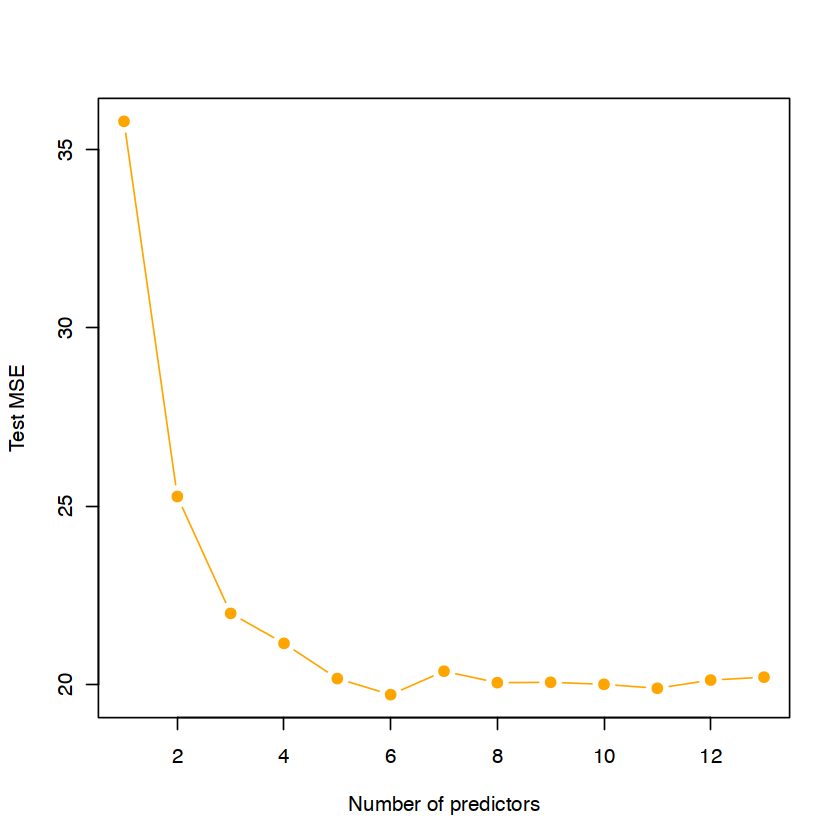

In [93]:
#Out of 13 models best model is chosen for minimum cv error on test set

boston.test.mat <- model.matrix(medv~ ., data = boston.test, nvmax = 13)
val.errors <- rep(NA, 13)
for (i in 1:13) {
    coefi <- coef(bsm, id = i)
    pred <- boston.test.mat[, names(coefi)] %*% coefi
    val.errors[i] <- mean((pred - boston.test$medv)^2)
}
plot(val.errors, xlab = "Number of predictors", ylab = "Test MSE", pch = 19, type = "b",col="orange")

In [94]:
which.min(val.errors)

[1] 6

In [95]:
coef(bsm,which.min(val.errors))

(Intercept)           nox            rm           dis       ptratio 
 35.727227298 -16.768532938   3.691516759  -1.212029553  -1.020410884 
        black         lstat 
  0.009801915  -0.556493153

In [96]:
bsm.MSE<-val.errors[11]
bsm.MSE

[1] 19.89142

Forward Selection

In [97]:
nullmodel<-lm(medv ~ 1, data = boston.train)
fullmodel<-lm(medv ~ ., data = boston.train)

fwd.model<-step(nullmodel, scope = list(lower = nullmodel, upper = fullmodel), 
    direction = "forward")

Start:  AIC=1572.07
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   15797.1 14070 1307.6
+ rm       1   13333.0 16534 1364.7
+ ptratio  1    7756.6 22111 1467.6
+ indus    1    6587.1 23280 1485.9
+ tax      1    5914.8 23952 1495.9
+ nox      1    4682.0 25185 1513.7
+ zn       1    4031.3 25836 1522.7
+ crim     1    3976.4 25891 1523.5
+ rad      1    3967.8 25900 1523.6
+ age      1    3815.1 26052 1525.7
+ black    1    3604.8 26262 1528.5
+ dis      1    1633.1 28234 1554.2
+ chas     1    1335.5 28532 1557.9
<none>                 29867 1572.1

Step:  AIC=1307.61
medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1   2394.47 11676 1243.6
+ ptratio  1   1920.87 12149 1257.7
+ chas     1    693.18 13377 1291.7
+ dis      1    512.30 13558 1296.5
+ age      1    207.26 13863 1304.4
+ black    1    201.16 13869 1304.5
+ zn       1    148.60 13922 1305.8
+ crim     1    131.58 13939 1306.3
+ tax      1    131.55 13939 1306.3
<none>                 14070 1307.6


In [98]:
summary(fwd.model)


Call:
lm(formula = medv ~ lstat + rm + ptratio + dis + nox + black + 
    rad + chas + crim + zn + tax, data = boston.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5507  -2.9089  -0.5722   1.6529  24.5174 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.287601   6.230424   6.787 5.06e-11 ***
lstat        -0.533226   0.054672  -9.753  < 2e-16 ***
rm            3.089394   0.489246   6.315 8.42e-10 ***
ptratio      -0.984942   0.158136  -6.228 1.38e-09 ***
dis          -1.589497   0.228156  -6.967 1.67e-11 ***
nox         -18.746617   4.247744  -4.413 1.37e-05 ***
black         0.010326   0.003278   3.150  0.00177 ** 
rad           0.372105   0.080327   4.632 5.15e-06 ***
chas          2.871222   1.013253   2.834  0.00487 ** 
crim         -0.116430   0.036674  -3.175  0.00164 ** 
zn            0.055366   0.016560   3.343  0.00092 ***
tax          -0.013237   0.004283  -3.091  0.00216 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

In [99]:
#Forward test MSE
fwd.predict<-predict(fwd.model,boston.test)
fwd.mse<-mean((fwd.predict-boston.test$medv)^2)
fwd.mse

[1] 19.89142

Backward Selection

In [100]:
bwd.model<-step(fullmodel,direction = "backward")

Start:  AIC=1139.03
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq     RSS    AIC
- indus    1     10.09  8176.6 1137.5
- age      1     17.20  8183.7 1137.8
<none>                  8166.5 1139.0
- chas     1    163.59  8330.1 1144.0
- tax      1    225.07  8391.6 1146.7
- black    1    230.90  8397.4 1146.9
- crim     1    240.56  8407.1 1147.3
- zn       1    289.52  8456.0 1149.4
- nox      1    477.76  8644.3 1157.2
- rad      1    523.10  8689.6 1159.0
- rm       1    897.43  9063.9 1173.9
- dis      1    918.45  9085.0 1174.8
- ptratio  1    951.56  9118.1 1176.0
- lstat    1   2163.67 10330.2 1220.2

Step:  AIC=1137.47
medv ~ crim + zn + chas + nox + rm + age + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq     RSS    AIC
- age      1     17.11  8193.7 1136.2
<none>                  8176.6 1137.5
- chas     1    185.59  8362.2 1143.4
- black    1    227.73  8404.3 1145.2
- tax     

In [101]:
summary(bwd.model)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = boston.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5507  -2.9089  -0.5722   1.6529  24.5174 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.287601   6.230424   6.787 5.06e-11 ***
crim         -0.116430   0.036674  -3.175  0.00164 ** 
zn            0.055366   0.016560   3.343  0.00092 ***
chas          2.871222   1.013253   2.834  0.00487 ** 
nox         -18.746617   4.247744  -4.413 1.37e-05 ***
rm            3.089394   0.489246   6.315 8.42e-10 ***
dis          -1.589497   0.228156  -6.967 1.67e-11 ***
rad           0.372105   0.080327   4.632 5.15e-06 ***
tax          -0.013237   0.004283  -3.091  0.00216 ** 
ptratio      -0.984942   0.158136  -6.228 1.38e-09 ***
black         0.010326   0.003278   3.150  0.00177 ** 
lstat        -0.533226   0.054672  -9.753  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

In [102]:
#Backward test MSE
bwd.predict<-predict(bwd.model,boston.test)
bwd.mse<-mean((bwd.predict-boston.test$medv)^2)
bwd.mse

[1] 19.89142

Stepwise Selection

In [103]:
step.model<-step(nullmodel, scope = list(lower = nullmodel, upper = fullmodel), 
    direction = "both")

Start:  AIC=1572.07
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   15797.1 14070 1307.6
+ rm       1   13333.0 16534 1364.7
+ ptratio  1    7756.6 22111 1467.6
+ indus    1    6587.1 23280 1485.9
+ tax      1    5914.8 23952 1495.9
+ nox      1    4682.0 25185 1513.7
+ zn       1    4031.3 25836 1522.7
+ crim     1    3976.4 25891 1523.5
+ rad      1    3967.8 25900 1523.6
+ age      1    3815.1 26052 1525.7
+ black    1    3604.8 26262 1528.5
+ dis      1    1633.1 28234 1554.2
+ chas     1    1335.5 28532 1557.9
<none>                 29867 1572.1

Step:  AIC=1307.61
medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1    2394.5 11676 1243.6
+ ptratio  1    1920.9 12149 1257.7
+ chas     1     693.2 13377 1291.7
+ dis      1     512.3 13558 1296.5
+ age      1     207.3 13863 1304.4
+ black    1     201.2 13869 1304.5
+ zn       1     148.6 13922 1305.8
+ crim     1     131.6 13939 1306.3
+ tax      1     131.6 13939 1306.3
<none>                 14070 1307.6


In [104]:
summary(step.model)


Call:
lm(formula = medv ~ lstat + rm + ptratio + dis + nox + black + 
    rad + chas + crim + zn + tax, data = boston.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5507  -2.9089  -0.5722   1.6529  24.5174 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.287601   6.230424   6.787 5.06e-11 ***
lstat        -0.533226   0.054672  -9.753  < 2e-16 ***
rm            3.089394   0.489246   6.315 8.42e-10 ***
ptratio      -0.984942   0.158136  -6.228 1.38e-09 ***
dis          -1.589497   0.228156  -6.967 1.67e-11 ***
nox         -18.746617   4.247744  -4.413 1.37e-05 ***
black         0.010326   0.003278   3.150  0.00177 ** 
rad           0.372105   0.080327   4.632 5.15e-06 ***
chas          2.871222   1.013253   2.834  0.00487 ** 
crim         -0.116430   0.036674  -3.175  0.00164 ** 
zn            0.055366   0.016560   3.343  0.00092 ***
tax          -0.013237   0.004283  -3.091  0.00216 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

In [105]:
#Stepwise test MSE
step.predict<-predict(step.model,boston.test)
step.mse<-mean((step.predict-boston.test$medv)^2)
step.mse

[1] 19.89142

Ridge Regression

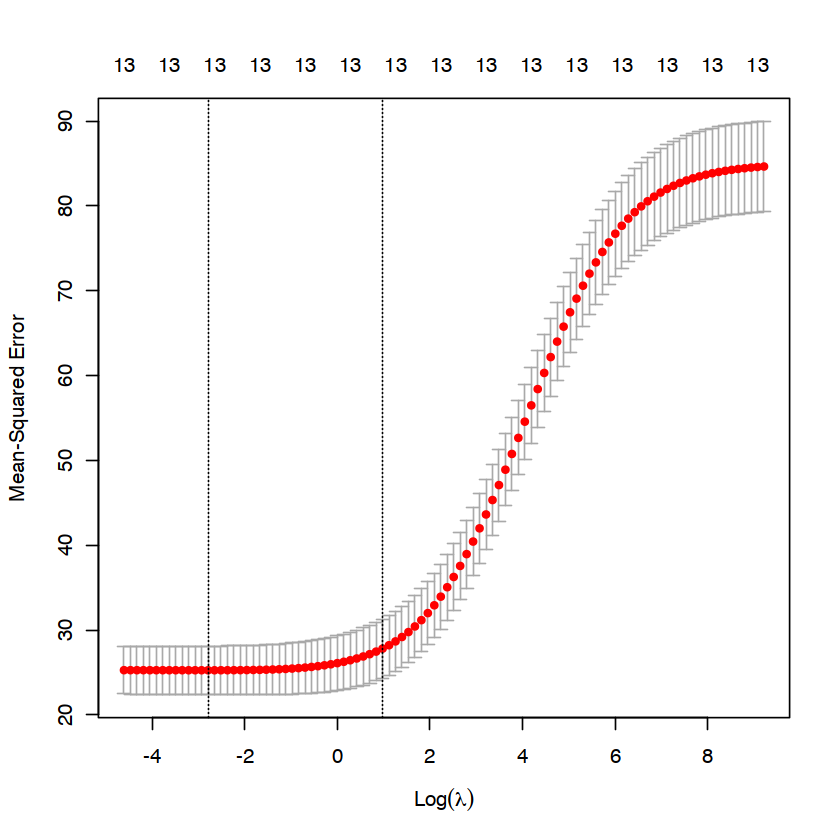

In [106]:
#Ridge Regression

#creating matrix for Ridge Regression
bostontrain.mat<-model.matrix(medv~.,data=boston.train)
bostontest.mat<-model.matrix(medv~.,data=boston.test)

#Defining grid that covers the wide range of lambda 
grid<-10^seq(4,-2,length=100)

#Fitting the ridge regression model
library(glmnet)
ridge.model<-glmnet(bostontrain.mat,boston.train$medv,alpha=0,lambda=grid)

#Finding lambda that gives minimum MSE by cross validation on training set
boston.cv.ridge<-cv.glmnet(bostontrain.mat,boston.train$medv,alpha=0,lambda=grid)

#Visualizing MSE vs Log(lambda)
plot(boston.cv.ridge)

In [107]:
#finding the lambda for which MSE is minimum on training data
boston.bestlam.ridge<-boston.cv.ridge$lambda.min
boston.bestlam.ridge

[1] 0.06135907

In [108]:
#fitting the Ridge model with with the value of lambda obtained and finding the coefficients
ridge.model.1<-glmnet(bostontrain.mat,boston.train$medv,alpha=0,lambda=boston.bestlam.ridge)
coef(ridge.model.1)

15 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  41.33589244
(Intercept)   .         
crim         -0.11271713
zn            0.05575326
indus         0.03694821
chas          2.76918562
nox         -19.68040877
rm            3.10017767
age           0.01236153
dis          -1.45640880
rad           0.35613105
tax          -0.01295401
ptratio      -0.99192311
black         0.01021852
lstat        -0.54638856

In [109]:
#using the lambda value obtained from cross validation for the ridge model directly on test data set to get the predicted values
boston.pred.newridge<-predict(ridge.model,s=boston.bestlam.ridge,newx=bostontest.mat)

#Mean Square Error calculation
ridge.MSE<-mean((boston.test$medv-boston.pred.newridge)^2)
ridge.MSE

[1] 20.02325

We perform ridge regression for a range of values of lambda and find MSE for training set.
The value of lambda corresponding to minimum MSE is used to build final model and for prediction

The value of lambda is 0.1417474 for which we got minimum train set MSE

**Lasso Regression:**

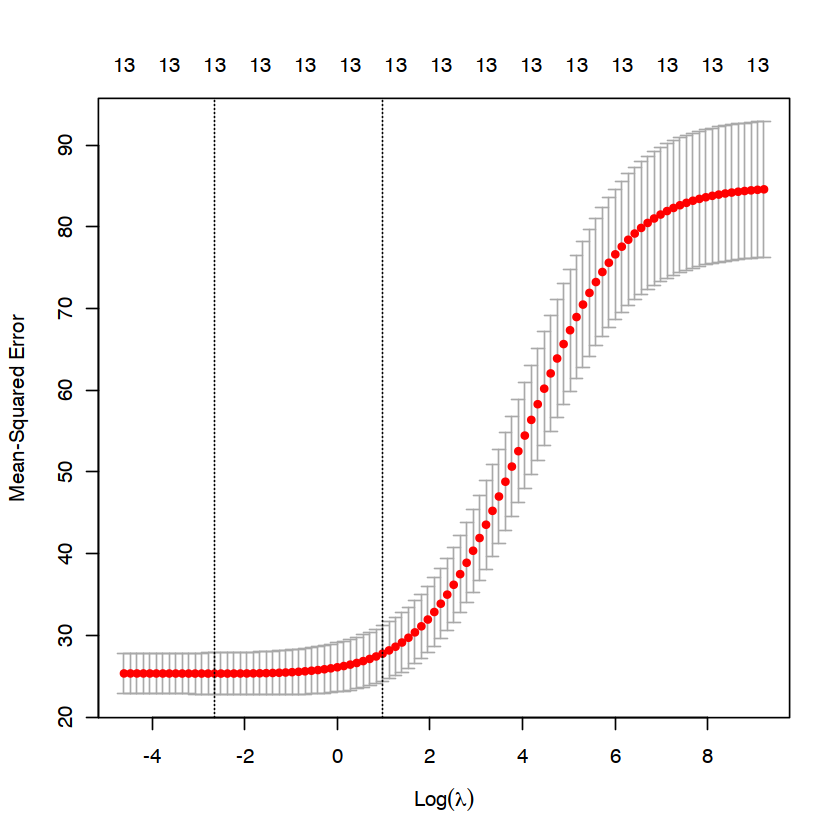

In [110]:
#Lasso Regression
lasso.model<-glmnet(bostontrain.mat,boston.train$medv,alpha=0,lambda=grid)

#finding lambda by cross validation and then finding MSE on test set using that lambda
boston.cv.lasso<-cv.glmnet(bostontrain.mat,boston.train$medv,alpha=0,lambda=grid)

#Visualizing MSE vs Log(lambda)
plot(boston.cv.lasso)

In [111]:
#finding the lambda for which cv error is minimum on training data
boston.bestlam.lasso<-boston.cv.lasso$lambda.min
boston.bestlam.lasso

[1] 0.07054802

In [112]:
#fitting the Lasso model with with the value of lambda obtained and finding the coefficients
lasso.model.1<-glmnet(bostontrain.mat,boston.train$medv,alpha=0,lambda=boston.bestlam.lasso)
coef(lasso.model.1)

15 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  41.12645854
(Intercept)   .         
crim         -0.11225340
zn            0.05539037
indus         0.03480340
chas          2.77839327
nox         -19.54746916
rm            3.10718007
age           0.01219423
dis          -1.45004404
rad           0.35164111
tax          -0.01272815
ptratio      -0.98968024
black         0.01021950
lstat        -0.54528646

In [113]:
#using the lambda value obtained from cross validation for the lasso model directly on test data set to get the predicted values
boston.pred.newlasso<-predict(lasso.model,s=boston.bestlam.lasso,newx=bostontest.mat)

#Mean Square Error calculation
lasso.MSE<-mean((boston.test$medv-boston.pred.newlasso)^2)
lasso.MSE

[1] 20.00398

We perform lasso regression for a range of values of lambda and find MSE for training set.
The value of lambda corresponding to minimum MSE is used to build final model and for prediction

The value of lambda is 0.1232847 for which we got minimum train set MSE

Principal Component Regression (PCR)

In [114]:
pcr.model<-pcr(medv~.,data=boston.train,scale=TRUE,validation="CV")
#13 component summary
summary(pcr.model)

Data: 	X dimension: 354 13 
	Y dimension: 354 1
Fit method: svdpc
Number of components considered: 13

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           9.211    7.456    6.865    5.844    5.726    5.393    5.391
adjCV        9.211    7.453    6.845    5.835    5.808    5.382    5.377
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       5.490    5.466    5.467     5.522     5.359     5.170     5.035
adjCV    5.479    5.454    5.456     5.509     5.376     5.157     5.023

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       47.05    58.52    68.09    74.46    80.63    85.61    89.92    92.97
medv    35.21    46.81    60.42    61.39    66.63    67.05    67.25    67.65
      9 comps  10 comps  11 comps  12 comps  13 comps
X       94.96     96.79     98.19     99.53    100.00
medv    67.69     68.08     

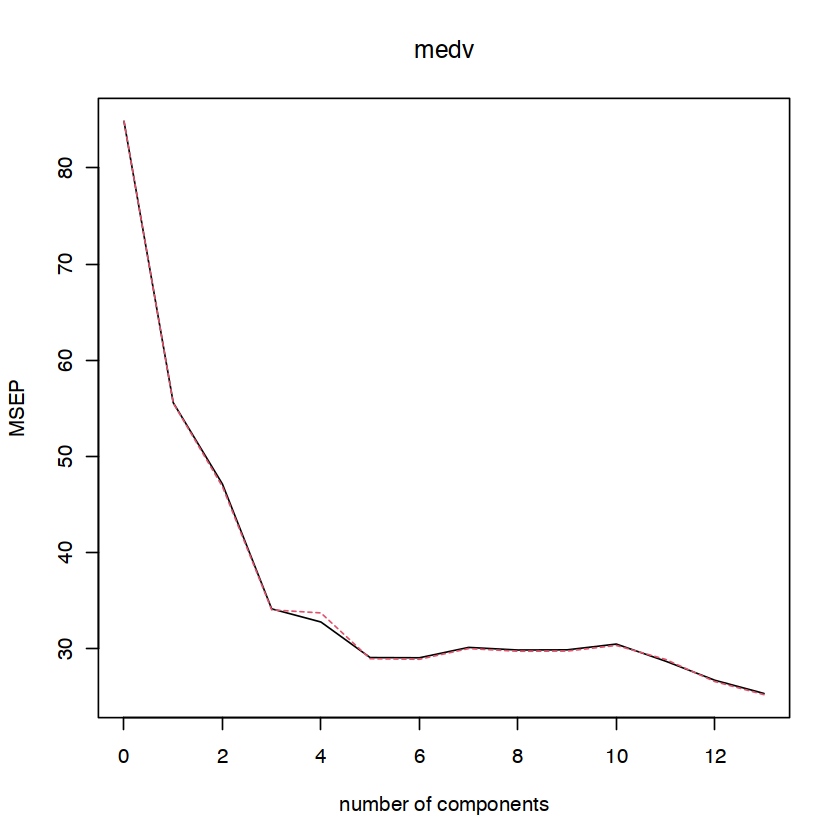

In [115]:
#plotting Mean square error (MSEP) for different number of components
validationplot(pcr.model,val.type="MSEP")

In [116]:
#using 5 components to build the final model 
pcr.model.5comp<-pcr(medv~.,data=boston.train,scale=TRUE,ncomp=5)
summary(pcr.model.5comp)

Data: 	X dimension: 354 13 
	Y dimension: 354 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps
X       47.05    58.52    68.09    74.46    80.63
medv    35.21    46.81    60.42    61.39    66.63


In [117]:
#Obtaining the scores of each principal component
pcr.model.5comp$coefficients

, , 1 comps

               medv
crim    -0.53175809
zn       0.57622360
indus   -0.77860333
chas     0.01776605
nox     -0.74431469
rm       0.43634076
age     -0.68874049
dis      0.71232474
rad     -0.70955592
tax     -0.74833494
ptratio -0.43602189
black    0.46627797
lstat   -0.67209136

, , 2 comps

               medv
crim    -1.21071358
zn      -0.14809224
indus   -0.48927268
chas     1.27823066
nox     -0.11336936
rm       1.02046370
age      0.08397745
dis     -0.17438284
rad     -1.31444256
tax     -1.28124676
ptratio -1.36777418
black    0.91899170
lstat   -0.95840209

, , 3 comps

              medv
crim    -0.2721110
zn       0.9075163
indus   -0.4930365
chas     1.9058442
nox      0.1681085
rm       2.6606756
age     -0.1692040
dis     -0.1947617
rad     -0.3900142
tax     -0.5005414
ptratio -2.3062997
black   -0.1170924
lstat   -1.7391997

, , 4 comps

                 medv
crim    -0.3526528703
zn       0.8176918291
indus   -0.5352363736
chas     1.0719253226
nox      0.3481753885
rm       2.9177171433
age     -0.0004679244
dis     -0.4010990204
rad     -0.4858686017
tax     -0.5587509096
ptratio -2.6007476825
black   -0.1651089144
lstat   -1.8260642816

, , 5 comps

               medv
crim    -0.43674101
zn       0.08656030
indus   -0.57880581
chas     0.96811230
nox      0.03157105
rm       3.93238083
age     -0.01353968
dis     -0.67690518
rad      0.03239119
tax     -0.25754040
ptratio -1.26045313
black    0.67316112
lstat   -2.77867496

In [118]:
#Using PCR model with 5 components (explaining 80 % of variation) to predict on test data
boston.predict.pcr<-predict(pcr.model,boston.test,ncomp=5)
pcr.MSE<-mean((boston.test$medv-boston.predict.pcr)^2)
pcr.MSE

[1] 19.51315

We perform Principal Component Regression and see summary for 13 components

Plot of MSE vs Number of Components suggests that minimum MSE is obtained for 13 components.This means that PCR is not helping in dimension reduction from p+1 to m+1

We select 5 as number of components in final model as 5 components explain about 80 % of variation

Scores of the components are also summarized. Scores are further used to fit the Principal Component Model

Partial Least Square (PLS)

Similar steps are followed as above for Partial Least square method

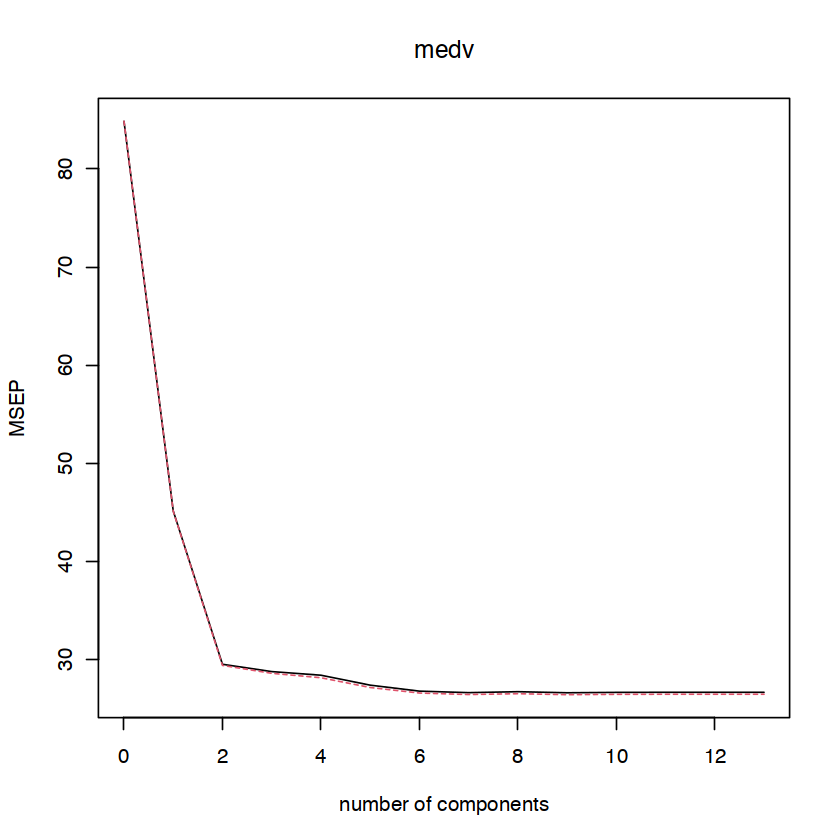

In [119]:
#Partial Least Square
plsr.model<-plsr(medv~.,data=boston.train,scale=TRUE,validation="CV")

#plotting Mean square error (MSEP) for different number of components
validationplot(plsr.model,val.type="MSEP")

In [120]:
#using 5 components to build the final model 
plsr.model.5comp<-plsr(medv~.,data=boston.train,scale=TRUE,ncomp=5)
summary(plsr.model.5comp)

Data: 	X dimension: 354 13 
	Y dimension: 354 1
Fit method: kernelpls
Number of components considered: 5
TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps
X       45.67    57.11    64.41    70.42    75.58
medv    47.85    67.84    70.13    71.48    72.22


In [121]:
#Obtaining the scores of each 
plsr.model.5comp$coefficients

, , 1 comps

              medv
crim    -0.6275163
zn       0.6318323
indus   -0.8076574
chas     0.3636642
nox     -0.6809210
rm       1.1490640
age     -0.6146528
dis      0.4021530
rad     -0.6268357
tax     -0.7653333
ptratio -0.8764279
black    0.5974794
lstat   -1.2507443

, , 2 comps

               medv
crim    -0.60532553
zn       0.48518874
indus   -0.42919219
chas     1.39501576
nox     -0.09018364
rm       3.22537040
age      0.03162683
dis     -1.12048017
rad      0.19165387
tax     -0.31535251
ptratio -2.00701997
black    0.78044833
lstat   -2.83593281

, , 3 comps

               medv
crim    -0.58630546
zn       0.68515122
indus   -0.47185781
chas     0.69994597
nox     -0.73224161
rm       3.22969427
age     -0.10898185
dis     -1.71478593
rad      1.05713147
tax     -0.01441998
ptratio -1.68889032
black    1.11819216
lstat   -3.65726526

, , 4 comps

              medv
crim    -1.0601101
zn       0.7225378
indus   -0.3750444
chas     0.7052129
nox     -1.5366223
rm       2.4093863
age      0.1592573
dis     -2.8113573
rad      1.5085483
tax     -0.4258534
ptratio -1.9062434
black    1.4095520
lstat   -4.1157129

, , 5 comps

              medv
crim    -1.0069620
zn       1.2678273
indus   -0.3318633
chas     0.8564768
nox     -2.2336947
rm       1.9720620
age      0.2447306
dis     -3.3588092
rad      2.0620024
tax     -0.7441311
ptratio -2.2694446
black    0.9397902
lstat   -4.2362876

In [122]:
boston.predict.plsr<-predict(plsr.model,boston.test,ncomp=5)
plsr.MSE<-mean((boston.test$medv-boston.predict.plsr)^2)
plsr.MSE

[1] 20.33305

**Part B**

Propose a model (or set of models) that seem to perform well on this data set, and justify your answer.
Make sure that you are evaluating model performance using validation set error, cross- validation, or some other reasonable alternative, as opposed to using training error.

Validation Set MSE is used for evaluating model performance

Below is the list of different approaches with the MSE obtained for Validation Data set.

Full Model: 17.96

Best Subset: 17.81

Forward Selection: 18.84

Backward Selection: 18.84

Stepwise Selection: 18.84

Ridge Regression: 17.74

Lasso Regression: 17.76

Principal Component Regression (PCR): 15.96

Partial Least Square (PLS): 19.42
The minimum validation is obtained for Principal Component Regression Model with 5 Principal Components

It is interesting to see that validation MSE for forward, backward and subset selection models is same

The second least MSE for Validation set is obtained for Ridge regression

Part C

Does your chosen model involve all of the features in the data set? Why or why not?

The PCR model contains 5 components which comprises of all the 13 predictor variables.
The weightage of each predictor variable for every component is given by scores

The Ridge regression model also contains all the predictor variables

This suggest that all the predictor variables are contributing in predicting the response variable

**# Chap 7 Ex 9**

This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concen- tration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.

**Part A**

Use the poly() function to fit a cubic polynomial regression to predict nox using dis.
Report the regression output, and plot the resulting data and polynomial fits.

In [123]:
fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


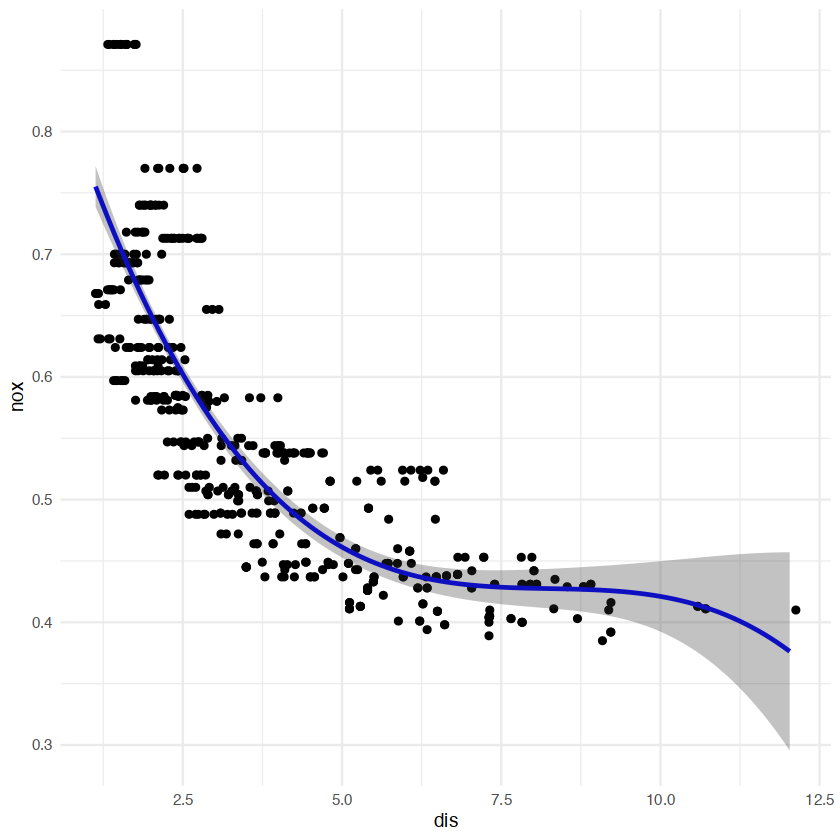

In [124]:
# Calculate fitted values
dis_range <- range(Boston$dis)
dis_grid <- seq(from = dis_range[1], to = dis_range[2], by = 0.1)
preds <- predict(fit, newdata = list(dis = dis_grid), se = TRUE)
preds_df <- data.frame(predictions = preds$fit,
                       upr = preds$fit + 2 * preds$se.fit,
                       lwr = preds$fit - 2 * preds$se.fit)
# Plot
ggplot() +
  geom_point(aes(x = dis, y = nox), data = Boston) +
  geom_path(aes(x = dis_grid, y = predictions), data = preds_df, size = 1, colour = "blue") +
  geom_ribbon(aes(ymin = lwr, ymax = upr, x = dis_grid), data = preds_df, alpha = 0.3) +
  theme_minimal()

The plot suggests the model fits the data quite well.
The model output shows a statistically significant relationship between the predictors and response.

**Part B**

Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

[1] "RSS for 1 degree polynomial: 2.76856285896928"
[1] "RSS for 2 degree polynomial: 2.03526186893526"
[1] "RSS for 3 degree polynomial: 1.93410670717907"
[1] "RSS for 4 degree polynomial: 1.93298132729859"
[1] "RSS for 5 degree polynomial: 1.91528996108431"
[1] "RSS for 6 degree polynomial: 1.87825729850817"
[1] "RSS for 7 degree polynomial: 1.84948361458298"
[1] "RSS for 8 degree polynomial: 1.83562968906769"
[1] "RSS for 9 degree polynomial: 1.8333308044916"
[1] "RSS for 10 degree polynomial: 1.83217112393137"


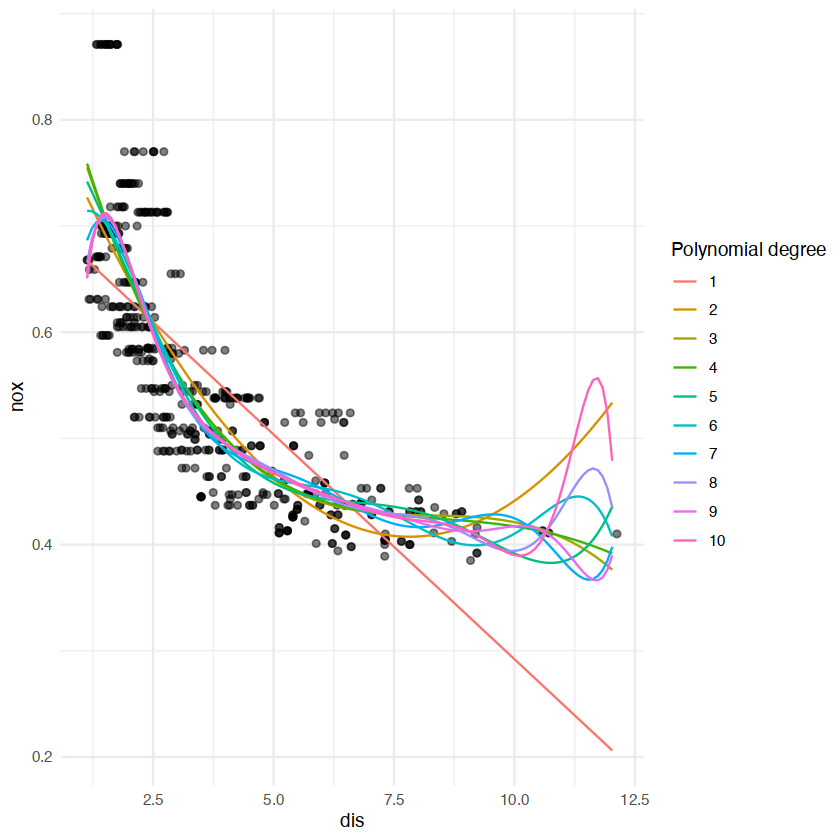

In [125]:
# Fit models
fits_poly <- lapply(1:10, function(i) {
  glm(nox ~ poly(dis, i), data = Boston)
})
# Calculate RSS and predictions
predictions <- lapply(fits_poly, function(fit) {
  d <- length(coefficients(fit)) - 1
  print(
    sprintf("RSS for %s degree polynomial: %s",
            d, 
            sum(resid(fit)^2))
  )
  preds <- predict(fit, newdata = list(dis = dis_grid), se = TRUE)
  data.frame(predictions = preds$fit,
             degree = d)
})
# Plot
preds_df <- do.call(rbind, predictions)
ggplot() +
  geom_point(aes(x = dis, y = nox), data = Boston, alpha = 0.5) +
  geom_path(aes(x = rep(dis_grid, 10), y = predictions, colour = as.factor(degree)), data = preds_df) +
  labs(x = "dis", y = "nox", colour = "Polynomial degree") +
  theme_minimal()

**Part C**

Perform cross-validation or another approach to select the opti- mal degree for the polynomial, and explain your results.

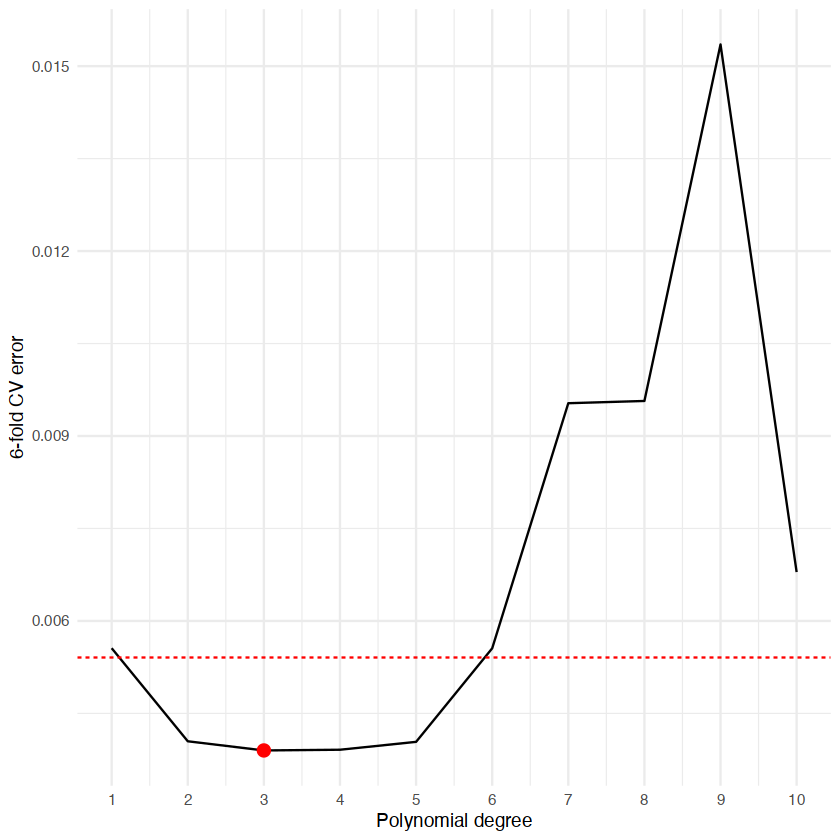

In [126]:
# Cross validation
k <- 6
cv_error <- vapply(1:10,
                   function(i) {
                     fit <- fits_poly[[i]]
                     cv.glm(Boston, fit, K = k)$delta[1]
                   },
                   1.0)
cv_stderr <- sd(cv_error) / sqrt(k)
# Plot
ggplot() +
  geom_path(aes(x = 1:10, y = cv_error)) +
  geom_hline(aes(yintercept = min(cv_error) + cv_stderr), colour = "red", linetype = "dashed") +
  geom_point(aes(x = which.min(cv_error), y = min(cv_error)), colour = "red", size = 3) +
  ylab("6-fold CV error") +
  xlab("Polynomial degree") +
  scale_x_continuous(breaks = 1:10) + 
  theme_minimal()

6-fold cross validation error is minimised in the model with a cubic polynomial. However, a linear model and quadratic polynomial both have a cross-validation error within one standard error of the cubic polynomial, so we could reasonably choose one of those because they are less complex. Polynomial degrees greater than six overfit the data, particularly a ninth degree polynomial.

**Part D**

Use the bs() function to fit a regression spline to predict nox using dis.
Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

In [130]:
spline_4df <- bs(Boston$dis, df = 4)
fit <- glm(nox ~ spline_4df, data = Boston)
attr(spline_4df, "knots")
summary(fit)

50% 
3.20745


Call:
glm(formula = nox ~ spline_4df, data = Boston)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.124622  -0.039259  -0.008514   0.020850   0.193891  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.73447    0.01460  50.306  < 2e-16 ***
spline_4df1 -0.05810    0.02186  -2.658  0.00812 ** 
spline_4df2 -0.46356    0.02366 -19.596  < 2e-16 ***
spline_4df3 -0.19979    0.04311  -4.634 4.58e-06 ***
spline_4df4 -0.38881    0.04551  -8.544  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.003837874)

    Null deviance: 6.7810  on 505  degrees of freedom
Residual deviance: 1.9228  on 501  degrees of freedom
AIC: -1371.9

Number of Fisher Scoring iterations: 2


The knots are chosen automatically where degrees of freedom are specified.
Specifying 4 degrees of freedom results in one knot at the median value of `dis` because the `df` option does not include the intercept.
The text states that a cubic spline with 1 knot corresponds to 5 degrees of freedom (parameters are estimated for the three polynomial terms, the intercept, and the basis function for the knot).

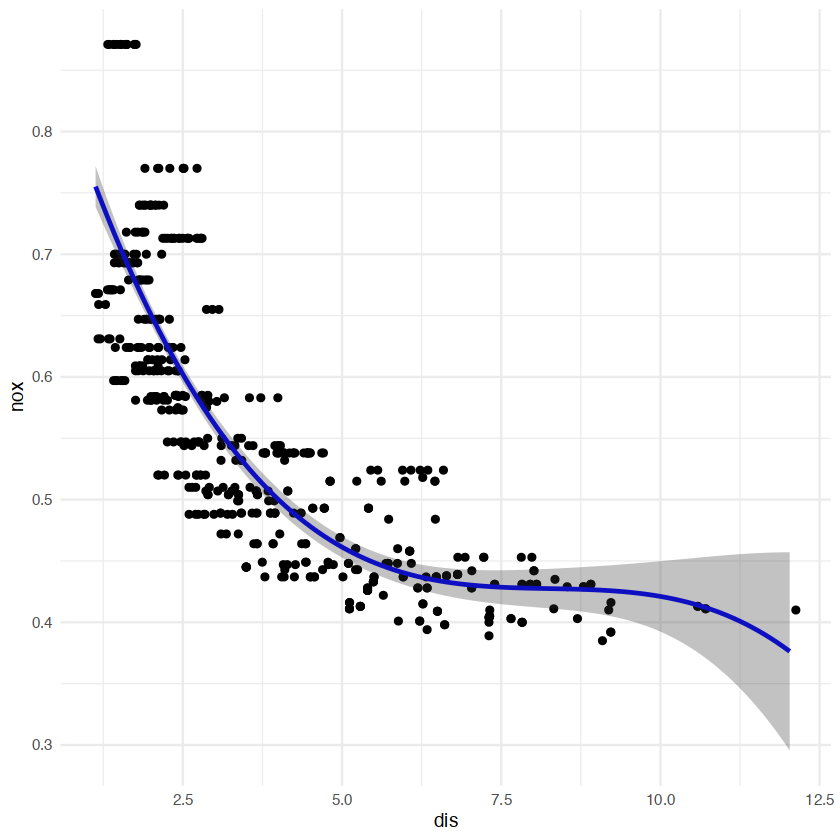

In [131]:
preds_df <- predict(fit, newdata = list(dis = dis_grid), se = TRUE)
preds_df <- data.frame(predictions = preds$fit, 
                       lower = preds$fit - 2 * preds$se.fit,
                       upper = preds$fit + 2 * preds$se.fit)
ggplot() +
  geom_point(aes(x = dis, y = nox), data = Boston) +
  geom_path(aes(x = dis_grid, y = predictions), data = preds_df, size = 1, colour = "blue") +
  geom_ribbon(aes(ymin = lower, ymax = upper, x = dis_grid), data = preds_df, alpha = 0.3) +
  theme_minimal()

**Part E**

Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

[1] "RSS for 3 degrees of freedom: 1.93410670717907"
[1] "RSS for 4 degrees of freedom: 1.92277499281192"
[1] "RSS for 5 degrees of freedom: 1.84017280148852"
[1] "RSS for 6 degrees of freedom: 1.83396590316021"
[1] "RSS for 7 degrees of freedom: 1.82988444592328"
[1] "RSS for 8 degrees of freedom: 1.81699505672523"
[1] "RSS for 9 degrees of freedom: 1.82565251038706"
[1] "RSS for 10 degrees of freedom: 1.79253488955613"
[1] "RSS for 11 degrees of freedom: 1.79699182173143"
[1] "RSS for 12 degrees of freedom: 1.78899914528888"
[1] "RSS for 13 degrees of freedom: 1.78235042874344"
[1] "RSS for 14 degrees of freedom: 1.78183805686312"
[1] "RSS for 15 degrees of freedom: 1.78279784044131"


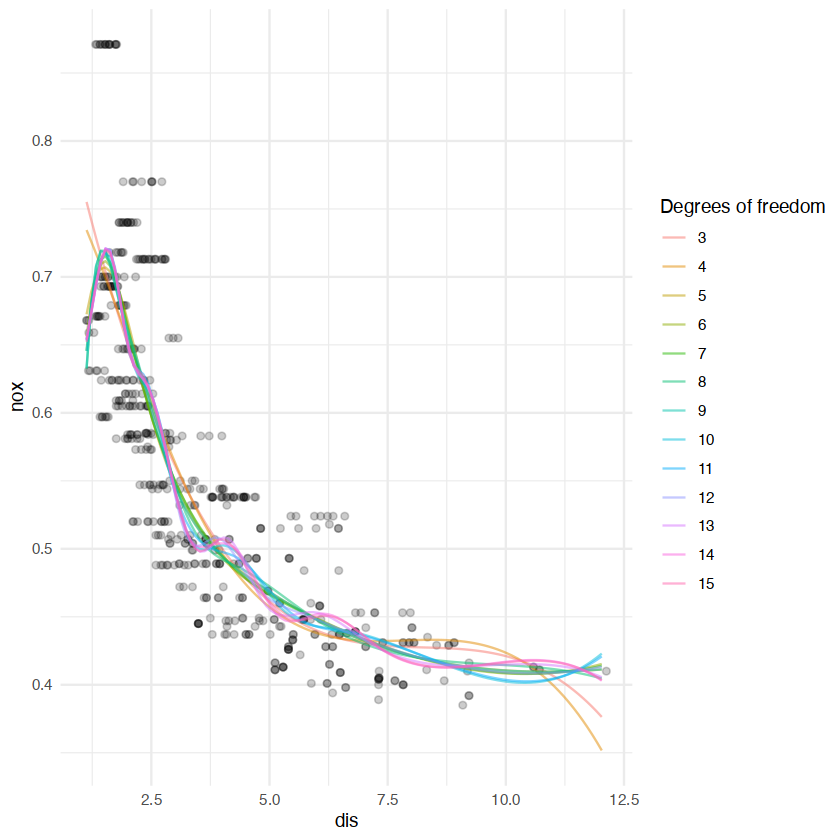

In [132]:
# Degrees of freedom range
dof <- 3:15
# Fit models
fits_spline <- lapply(dof, 
               function(dof) {
                 fit <- glm(nox ~ bs(dis, dof), data = Boston) 
                 print(
                   sprintf("RSS for %s degrees of freedom: %s",
                           dof, 
                           sum(resid(fit)^2))
                 )
                 fit
               })
# Calculate predictions
predictions <- lapply(fits_spline, function(fit) {
  preds <- predict(fit, newdata = list(dis = dis_grid), se = TRUE)
  data.frame(predictions = preds$fit,
             dof = fit$df.null - fit$df.residual)
})
# Plot
preds_df <- do.call(rbind, predictions)
ggplot() +
  geom_point(aes(x = dis, y = nox), data = Boston, alpha = 0.2) +
  geom_path(aes(x = rep(dis_grid, 13), y = predictions, colour = as.factor(dof)), data = preds_df, alpha = 0.5) +
  labs(x = "dis", y = "nox", colour = "Degrees of freedom") +
  theme_minimal()

The regression splines are more stable than the higher degree polynomial regressions, particularly at the extremes of `dis`.
The shape of the plots for models over 10 or 11 degrees of freedom is quite wiggly, which may suggest an overly complex fit.
Nevertheless, at high values of `dis` none of the regression splines are as variable as the higher-order polynomial fits. 

The RSS is smallest at 14 degrees of freedom, so training RSS does not decrease monotonically as it did for the various polynomial regressions.
This is due to the fact that the regression spline fits are not nested - new knot locations are estimated with each new fit.
In contrast, for the polynomial fits, where less complex models are nested in more complex models, training RSS decreases monotonically with model complexity.

**Part F**

Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data.
Describe your results.

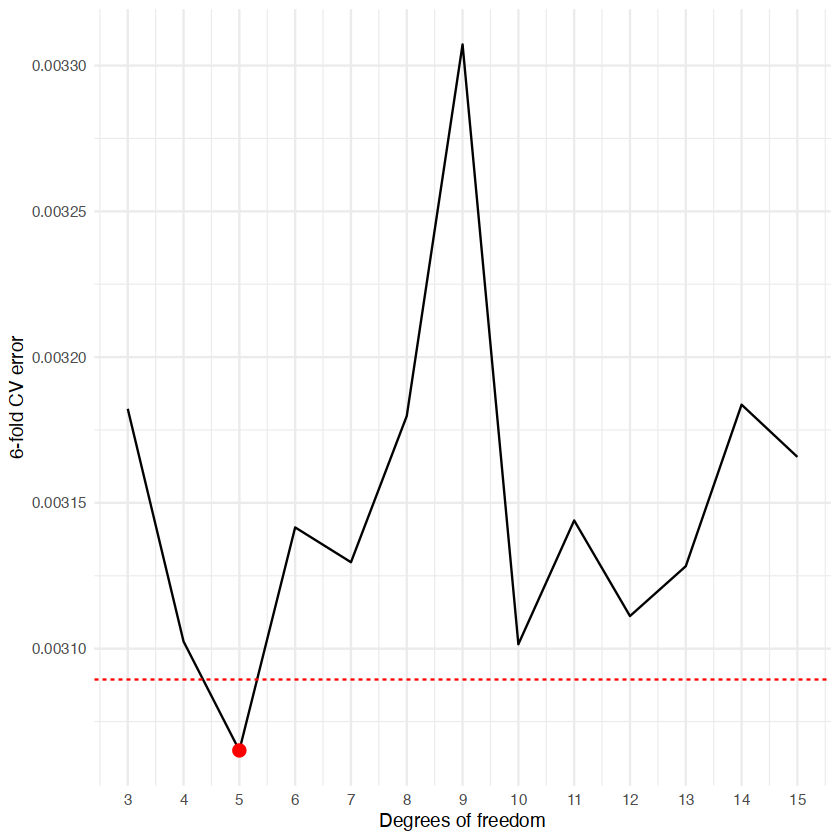

In [133]:
# Cross validation
k <- 6
cv_error <- vapply(dof,
                   function(dof) {
                     # Calculate bs values before fitting the model, or else `cv.glm` will complain
                     Boston_modframe <- model.frame(nox ~ bs(dis, dof), data = Boston)
                     fit <- glm(nox ~ ., data = Boston_modframe)
                     cv.glm(Boston, fit, K = k)$delta[1] 
                   },
                   1.0)
cv_stderr <- sd(cv_error) / sqrt(k)
# Plot
ggplot() +
  geom_path(aes(x = dof, y = cv_error)) +
  geom_hline(aes(yintercept = min(cv_error) + cv_stderr), colour = "red", linetype = "dashed") +
  geom_point(aes(x = which.min(cv_error) + 2, y = min(cv_error)), colour = "red", size = 3) +
  ylab("6-fold CV error") +
  xlab("Degrees of freedom") +
  scale_x_continuous(breaks = dof) + 
  theme_minimal()

Cross-validation suggests we should pick the model with  10 degrees of freedom, because this is the fit with the lowest estimated MSE that is within one standard error of the minimum estimated test MSE. The estimated error does not appear very stable however, so may be very dependent on the specific folds used. Overall, when assessed using CV error, regression splines appear to outperform polynomial regressions.

**# Chap 8 Ex 9**

This problem involves the OJ data set which is part of the ISLR2 package.

**Part A**

Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [134]:
attach(OJ)

train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

**Part B**

Fit a tree to the training data, with Purchase as the response and the other variables as predictors.
Use the summary() function to produce summary statistics about the tree, and describe the results obtained.
What is the training error rate? How many terminal nodes does the tree have?

In [137]:
oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  7 
Residual mean deviance:  0.7626 = 604.7 / 793 
Misclassification error rate: 0.165 = 132 / 800 

Training error rate (misclassification error) for the tree is 0.155

**Part C**

Type in the name of the tree object in order to get a detailed text output.
Pick one of the terminal nodes, and interpret the information displayed.

In [138]:
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1063.00 CH ( 0.61875 0.38125 )  
   2) LoyalCH < 0.48285 297  333.50 MM ( 0.24916 0.75084 )  
     4) LoyalCH < 0.0616725 65   10.33 MM ( 0.01538 0.98462 ) *
     5) LoyalCH > 0.0616725 232  289.00 MM ( 0.31466 0.68534 )  
      10) PriceDiff < 0.31 185  209.70 MM ( 0.25405 0.74595 ) *
      11) PriceDiff > 0.31 47   64.62 CH ( 0.55319 0.44681 ) *
   3) LoyalCH > 0.48285 503  447.30 CH ( 0.83698 0.16302 )  
     6) LoyalCH < 0.753545 236  292.00 CH ( 0.69068 0.30932 )  
      12) PriceDiff < -0.165 35   37.63 MM ( 0.22857 0.77143 ) *
      13) PriceDiff > -0.165 201  216.20 CH ( 0.77114 0.22886 )  
        26) PriceDiff < 0.265 113  141.40 CH ( 0.68142 0.31858 ) *
        27) PriceDiff > 0.265 88   62.31 CH ( 0.88636 0.11364 ) *
     7) LoyalCH > 0.753545 267   78.71 CH ( 0.96629 0.03371 ) *

Let's pick terminal node labeled “10)”. The splitting variable at this node is PriceDiff.
The splitting value of this node is 0.05. There are 79 points in the subtree below this node. The deviance for all points contained in region below this node is 80. A * in the line denotes that this is in fact a terminal node. The prediction at this node is Sales = MM. About 19% points in this node have CH as value of Sales.
Remaining 81% points have MM as value of Sales.

**Part D**

Create a plot of the tree, and interpret the results.

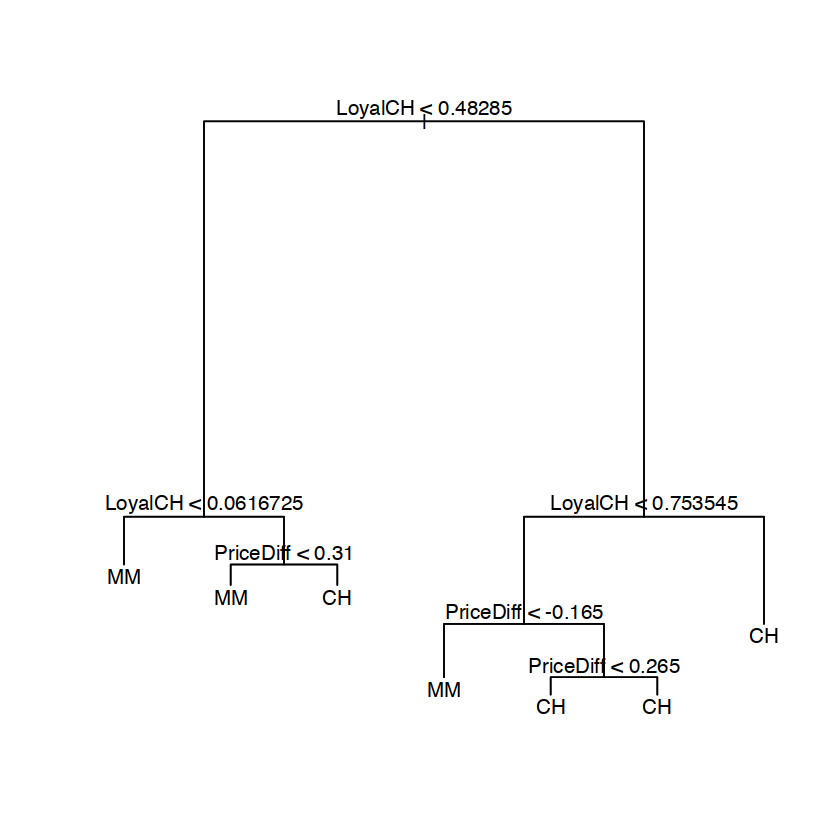

In [139]:
plot(oj.tree)
text(oj.tree, pretty = 0)

𝙻𝚘𝚢𝚊𝚕𝙲𝙷 is the most important variable of the tree, in fact top 3 nodes contain 𝙻𝚘𝚢𝚊𝚕𝙲𝙷.
If 𝙻𝚘𝚢𝚊𝚕𝙲𝙷<𝟶.𝟸𝟽 , the tree predicts 𝙼𝙼. If 𝙻𝚘𝚢𝚊𝚕𝙲𝙷>𝟶.𝟽𝟼, the tree predicts 𝙲𝙷. For intermediate values of 𝙻𝚘𝚢𝚊𝚕𝙲𝙷,
the decision also depends on the value of 𝙿𝚛𝚒𝚌𝚎𝙳𝚒𝚏𝚏.

**Part E**

Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [140]:
oj.pred = predict(oj.tree, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 142  16
  MM  33  79

**Part F**

Apply the cv.tree() function to the training set in order to determine the optimal tree size.

In [141]:
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

**Part G**

Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

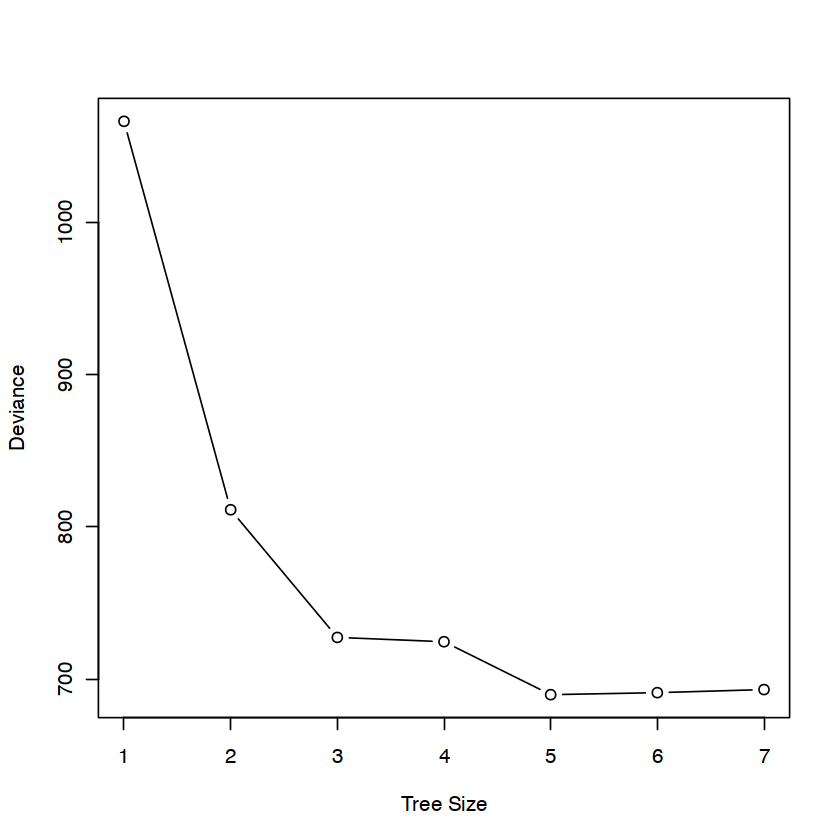

In [142]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

**Part H**

Which tree size corresponds to the lowest cross-validated classi- fication error rate?

Size of 6 gives lowest cross-validation error.

**Part I**

Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation.
If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

In [143]:
oj.pruned = prune.tree(oj.tree, best = 6)

**Part J**

Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [144]:
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = 13L)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7774 = 617.2 / 794 
Misclassification error rate: 0.165 = 132 / 800 

Misclassification error of pruned tree is exactly same as that of original tree — 0.155.

**Part K**

Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [145]:
pred.unpruned = predict(oj.tree, OJ.test, type = "class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned/length(pred.unpruned)

[1] 0.1814815

In [146]:
pred.pruned = predict(oj.pruned, OJ.test, type = "class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned/length(pred.pruned)

[1] 0.1814815

Pruned and unpruned trees have same test error rate of 0.189.

**# Chap 8 Ex 12**

Apply boosting, bagging, random forests, and BART to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

In [147]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [148]:
train = sample(nrow(Weekly), 2/3 * nrow(Weekly))
test = -train

Logistic regression

In [150]:
glm.fit = glm(Direction ~ . - Year - Today, data = Weekly[train, ], family = "binomial")
glm.probs = predict(glm.fit, newdata = Weekly[test, ], type = "response")
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Weekly$Direction[test])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


        
glm.pred Down  Up
    Down   39  40
    Up    102 182

In [151]:
mean(glm.pred != Weekly$Direction[test])

[1] 0.3911846

Boosting

In [155]:
Weekly$BinomialDirection = ifelse(Weekly$Direction == "Up", 1, 0)
boost.weekly = gbm(BinomialDirection ~ . - Year - Today - Direction, data = Weekly[train, 
    ], distribution = "bernoulli", n.trees = 5000)
yhat.boost = predict(boost.weekly, newdata = Weekly[test, ], n.trees = 5000)
yhat.pred = rep(0, length(yhat.boost))
yhat.pred[yhat.boost > 0.5] = 1
table(yhat.pred, Weekly$BinomialDirection[test])

         
yhat.pred   0   1
        0  80 122
        1  61 100

In [156]:
mean(yhat.pred != Weekly$BinomialDirection[test])

[1] 0.5041322

Bagging

In [158]:
Weekly = Weekly[, !(names(Weekly) %in% c("BinomialDirection"))]
library(randomForest)

In [159]:
bag.weekly = randomForest(Direction ~ . - Year - Today, data = Weekly, subset = train, 
    mtry = 6)
yhat.bag = predict(bag.weekly, newdata = Weekly[test, ])
table(yhat.bag, Weekly$Direction[test])

        
yhat.bag Down  Up
    Down   69  86
    Up     72 136

In [160]:
mean(yhat.bag != Weekly$Direction[test])

[1] 0.4352617

Random forests

In [161]:
rf.weekly = randomForest(Direction ~ . - Year - Today, data = Weekly, subset = train, 
    mtry = 2)
yhat.bag = predict(rf.weekly, newdata = Weekly[test, ])
table(yhat.bag, Weekly$Direction[test])

        
yhat.bag Down  Up
    Down   65  83
    Up     76 139

In [162]:
mean(yhat.bag != Weekly$Direction[test])

[1] 0.4380165

Best performance summary

Boosting resulted in the lowest validation set test error rate.

**# Chap 9 Ex 8**

This problem involves the OJ data set which is part of the ISLR2 package.

**Part A**

Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations

In [163]:
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

**Part B**

Fit a support vector classifier to the training data using cost = 0.01, with Purchase as the response and the other variables as predictors.
Use the summary() function to produce summary statistics, and describe the results obtained.

In [164]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  427

 ( 214 213 )


Number of Classes:  2 

Levels: 
 CH MM




Support vector classifier creates 432 support vectors out of 800 training points. Out of these, 217 belong to level 𝙲𝙷 and remaining 215 belong to level 𝙼𝙼.

**Part C**

What are the training and test error rates?

In [165]:
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 420  59
  MM  64 257

In [166]:
(82 + 53)/(439 + 53 + 82 + 226)

[1] 0.16875

In [167]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 153  21
  MM  33  63

In [168]:
(19 + 29)/(142 + 19 + 29 + 80)

[1] 0.1777778

The training error rate is 16.9% and test error rate is about 17.8%.

**Part D**

Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

In [169]:
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2,1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.5623413

- best performance: 0.16 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.16500 0.03216710
2   0.01778279 0.16750 0.03395258
3   0.03162278 0.16625 0.03387579
4   0.05623413 0.16250 0.02763854
5   0.10000000 0.16875 0.03448530
6   0.17782794 0.16750 0.03238227
7   0.31622777 0.16250 0.02886751
8   0.56234133 0.16000 0.02622022
9   1.00000000 0.16375 0.03087272
10  1.77827941 0.16375 0.03087272
11  3.16227766 0.16375 0.03087272
12  5.62341325 0.16125 0.03087272
13 10.00000000 0.16500 0.03574602


Tuning shows that optimal cost is 0.5623

**Part E**

Compute the training and test error rates using this new value for cost.

In [170]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 420  59
  MM  61 260

In [171]:
(59 + 61)/(420 + 59 + 61 + 260)

[1] 0.15

In [172]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 155  19
  MM  32  64

In [173]:
(19 + 32)/(155 + 19 + 32 + 64)

[1] 0.1888889

The training error decreases to 15% but test error slightly increases to 18.8% by using best cost.

**Part F**

Repeat parts (B) through (E) using a support vector machine with a radial kernel. Use the default value for gamma.

In [174]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  360

 ( 183 177 )


Number of Classes:  2 

Levels: 
 CH MM




In [175]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 439  40
  MM  65 256

In [176]:
(40 + 65)/(439 + 40 + 65 + 256)

[1] 0.13125

In [177]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 148  26
  MM  29  67

In [178]:
(26 + 29)/(148 + 26 + 29 + 67)

[1] 0.2037037

The radial basis kernel with default gamma creates 360 support vectors, out of which, 183 belong to level 𝙲𝙷 and remaining 177 belong to level 𝙼𝙼. The classifier has a training error of 13.1% and a test error of 20.3% which is a slight improvement over linear kernel.
We now use cross validation to find optimal gamma.

In [179]:
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2,1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.5623413

- best performance: 0.15875 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.40125 0.06276333
2   0.01778279 0.40125 0.06276333
3   0.03162278 0.30000 0.07905694
4   0.05623413 0.18125 0.04686342
5   0.10000000 0.17250 0.04556741
6   0.17782794 0.16875 0.04259385
7   0.31622777 0.16125 0.04308019
8   0.56234133 0.15875 0.03634805
9   1.00000000 0.16375 0.03793727
10  1.77827941 0.16750 0.04495368
11  3.16227766 0.17250 0.03670453
12  5.62341325 0.17500 0.03435921
13 10.00000000 0.18125 0.03448530


In [180]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 437  42
  MM  68 253

In [181]:
(42 + 68)/(437 + 42 + 68 + 253)

[1] 0.1375

In [182]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 150  24
  MM  28  68

In [183]:
(28 + 24)/(150 + 24 + 28 + 68)

[1] 0.1925926

Tuning slightly decreases training error to 13.7% and slightly increases test error to 19% which is still better than linear kernel.

**Part G**

Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

In [184]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  454

 ( 231 223 )


Number of Classes:  2 

Levels: 
 CH MM




In [185]:
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 448  31
  MM 104 217

In [186]:
(31 + 104)/(448 + 31 + 104 + 217)

[1] 0.16875

In [187]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 150  24
  MM  33  63

In [188]:
(24 + 33)/(150 + 24 + 33 + 63)

[1] 0.2111111

Summary shows that polynomial kernel produces 454 support vectors, out of which, 231 belong to level 𝙲𝙷 and remaining 223 belong to level 𝙼𝙼.
This kernel produces a train error of 16.8% and a test error of 21.1% which are slightly higher than the errors produces by radial kernel but lower than the errors produced by linear kernel.

In [189]:
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, 
    ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 5.623413

- best performance: 0.165 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.40000 0.04677072
2   0.01778279 0.38125 0.04796194
3   0.03162278 0.37125 0.04372023
4   0.05623413 0.34875 0.06467064
5   0.10000000 0.33000 0.06324555
6   0.17782794 0.23500 0.04031129
7   0.31622777 0.20875 0.03682259
8   0.56234133 0.19875 0.03197764
9   1.00000000 0.19000 0.04518481
10  1.77827941 0.18375 0.04084609
11  3.16227766 0.18000 0.04048319
12  5.62341325 0.16500 0.04706674
13 10.00000000 0.16750 0.04456581


In [190]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 440  39
  MM  72 249

In [191]:
(39 + 72)/(440 + 39 + 72 + 249)

[1] 0.13875

In [192]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 148  26
  MM  33  63

In [193]:
(26 + 33)/(148 + 26 + 33 + 63)

[1] 0.2185185

Tuning reduces the training error to 13.87% and test error to 21.85% which is worse than radial kernel but slightly better than linear kernel.

**Part H**

Overall, which approach seems to give the best results on this data?

Overall, radial basis kernel seems to be producing minimum misclassification error on both train and test data.